Usare rpy2

Aggiungere https://github.com/pajaskowiak/clusterConfusion e rimuovere CVDD

https://github.com/davidechicco/DBCVindex

aggiornare repository con nuovo codice


#**Library**

In [ ]:
#%load_ext rpy2.ipython


In [ ]:
# %%R
# install.packages("devtools")
# install.packages("cluster")
# install.packages("pegas")
# install.packages("proxy")


In [ ]:
# %%R
# system("git clone https://github.com/janagauss/dcsi.git")
# source("dcsi/code/functions/separability_functions.R")


In [ ]:
# pip install "git+https://github.com/FelSiq/DBCV"

In [ ]:
pip install hdbscan

In [ ]:
# pip install --upgrade cdbw

In [ ]:
# !git clone https://github.com/senolali/VIASCKDE.git
# da citare:
#"Ali Şenol, "VIASCKDE Index: A Novel Internal Cluster Validity Index for Arbitrary-Shaped Clusters Based on the Kernel Density Estimation",
# Computational Intelligence and Neuroscience, vol. 2022, Article ID 4059302, 20 pages, 2022. https://doi.org/10.1155/2022/4059302"



In [ ]:
# !wget https://raw.githubusercontent.com/senolali/VIASCKDE/master/VIASCKDE.py


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_moons, make_circles
import hdbscan
from hdbscan import HDBSCAN
import time
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from scipy.spatial.distance import euclidean
#from dbcv import dbcv
import random
from sklearn.metrics.pairwise import euclidean_distances
from sklearn.metrics import silhouette_score, adjusted_rand_score, adjusted_mutual_info_score,adjusted_rand_score , davies_bouldin_score, calinski_harabasz_score
from sklearn.cluster import DBSCAN
from sklearn.utils import resample
from scipy.stats import entropy
import math
from scipy.spatial.distance import pdist, squareform
from sklearn.cluster import KMeans
from sklearn.utils import resample
import scipy.io
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.cluster import MeanShift, estimate_bandwidth
from scipy.special import erf
import numpy as np
import warnings
from matplotlib.backends.backend_pdf import PdfPages
# from cdbw import CDbw
# from threading import Thread
# from queue import Queue
# from sklearn.exceptions import NotFittedError
# import VIASCKDE
#warnings.simplefilter(action='ignore', category=FutureWarning)



/usr/local/lib/python3.12/dist-packages/hdbscan/plots.py:448: SyntaxWarning: invalid escape sequence '\l'
  axis.set_ylabel('$\lambda$ value')
/usr/local/lib/python3.12/dist-packages/hdbscan/robust_single_linkage_.py:175: SyntaxWarning: invalid escape sequence '\{'
  $max \{ core_k(a), core_k(b), 1/\alpha d(a,b) \}$.


In [ ]:
# from sklearn.metrics import pairwise_distances
# from rpy2.robjects import numpy2ri
# import rpy2.robjects as robjects
# from rpy2.robjects import r
# numpy2ri.activate()

In [ ]:
from google.colab import output

In [ ]:
!wget https://ssd.mathworks.com/supportfiles/downloads/R2025a/Release/0/deployment_files/installer/complete/glnxa64/MATLAB_Runtime_R2025a_glnxa64.zip
!unzip MATLAB_Runtime_R2025a_glnxa64.zip -d MATLAB_Runtime
!sudo ./MATLAB_Runtime/install -agreeToLicense yes
output.clear()

#**Function**

In [ ]:
def optimalK(data, maxClusters):
    """
    Calculates KMeans optimal K using Gap Statistic from Tibshirani, Walther, Hastie
    Params:
        data: ndarray of shape (n_samples, n_features)
        maxClusters: Maximum number of clusters to test for
    Returns: (gaps, optimalK)
    """
    nrefs = 3
    gaps = np.zeros((len(range(1, maxClusters)),))
    results = []

    for gap_index, k in enumerate(range(1, maxClusters)):

        refDisps = np.zeros(nrefs)

        for i in range(nrefs):
            randomReference = np.random.random_sample(size=data.shape)
            km = KMeans(n_clusters=k)
            km.fit(randomReference)

            refDisp = km.inertia_
            refDisps[i] = refDisp
        km = KMeans(n_clusters=k)
        km.fit(data)

        origDisp = km.inertia_

        gap = np.log(np.mean(refDisps)) - np.log(origDisp)

        gaps[gap_index] = gap
        results.append({'clusterCount': k, 'gap': gap})
    resultsdf = pd.DataFrame(results)
    return gaps.argmax() + 1, resultsdf

In [ ]:
def generate_moon_datasets(seed):
    datasets = []

    for noise in [0.0, 0.056, 0.111, 0.167, 0.222, 0.278, 0.333, 0.389, 0.444, 0.5]:
        X, _ = make_moons(n_samples=1000, noise=noise, random_state=seed)
        datasets.append(X)

    return datasets

In [ ]:
def plot_datasets(datasets):
    fig, axes = plt.subplots(2, 5, figsize=(20, 8))

    for i, dataset in enumerate(datasets):
        row = i // 5
        col = i % 5
        ax = axes[row, col]
        ax.scatter(dataset[:, 0], dataset[:, 1], c='black', s=1)
        ax.set_title(f'Dataset {i+1}')
        ax.set_xlim(-1.5, 2.5)
        ax.set_ylim(-1.0, 1.5)
    plt.grid(True)
    plt.tight_layout()
    plt.show()

In [ ]:
def plot_best_results_compare(datasets, results, best_params):
    fig, axs = plt.subplots(2, 5, figsize=(20, 8))
    min_samples, epsilon = best_params

    for i, (X, dataset_results) in enumerate(zip(datasets, results)):
        print(dataset_results)
        for min_samples_, epsilon_, dbcv_score, silhouette, dunn_index, davies_bouldin, calinski_harabasz,shannon_entropy, labels in dataset_results:
            if (min_samples_, epsilon_) == best_params:
                ax = axs[i // 5, i % 5]
                ax.scatter(X[:, 0], X[:, 1], c=labels, cmap='viridis', s=10)
                ax.set_title(f'min_samples={min_samples}, epsilon={epsilon}\ndbcv={dbcv_score:.3f}\nsilhouette={silhouette:.3f}\ndunn={dunn_index:.3f}\ndavies={davies_bouldin:.3f}\ncalinski={calinski_harabasz:.3f}\nshannon_entropy={shannon_entropy:.3f}')
                ax.set_xticks([])
                ax.set_yticks([])
                break

    plt.grid(True)
    plt.tight_layout()
    plt.show()

In [ ]:
#Se non funziona usare funzione precedente
def calculate_dunn_index(X, labels):

    X = np.array(X) if not isinstance(X, np.ndarray) else X
    unique_labels = np.unique(labels)
    if len(unique_labels) < 2:
        return -1

    distances = np.sqrt(((X[:, np.newaxis, :] - X[np.newaxis, :, :]) ** 2).sum(axis=2))
    min_intercluster_distances = np.inf
    for label_i in unique_labels:
        cluster_i = X[labels == label_i]
        for label_j in unique_labels:
            if label_i != label_j:
                cluster_j = X[labels == label_j]
                intercluster_distances = np.min(distances[np.ix_(labels == label_i, labels == label_j)])
                min_intercluster_distances = min(min_intercluster_distances, intercluster_distances)
    max_intracluster_distances = 0
    for label in unique_labels:
        cluster = X[labels == label]
        intracluster_distances = np.max(distances[np.ix_(labels == label, labels == label)])
        max_intracluster_distances = max(max_intracluster_distances, intracluster_distances)
    return min_intercluster_distances / max_intracluster_distances



In [ ]:
def analyze_datasets(datasets):
    results = []
    param_grid = {
        'min_samples': [10],
        'epsilon': [0.1]
    }

    for X in datasets:
        dataset_results = []
        for min_samples in param_grid['min_samples']:
            for epsilon in param_grid['epsilon']:
                clusterer = DBSCAN(min_samples=min_samples, eps=epsilon)
                #clusterer = hdbscan.HDBSCAN(min_samples = min_samples, cluster_selection_epsilon=epsilon)
                labels = clusterer.fit_predict(X)

                dbcv_score = dbcv(X, labels)
                silhouette = silhouette_score(X, labels) if len(set(labels)) > 1 else -1
                dunn_index = calculate_dunn_index(X, labels)
                davies_bouldin = davies_bouldin_score(X, labels) if len(set(labels)) > 1 else -1
                calinski_harabasz = calinski_harabasz_score(X, labels) if len(set(labels)) > 1 else -1
                shannon_entropy = calculate_shannon_entropy(labels)
                dataset_results.append((min_samples, epsilon, dbcv_score, silhouette, dunn_index,
                                        davies_bouldin, calinski_harabasz, shannon_entropy, labels))

        results.append(dataset_results)

    return results

In [ ]:
def analyze_datasets_best_params(datasets):
    results = []
    param_grid = {
        'min_samples': [1, 5, 10, 50],
        'epsilon': [0.01, 0.1, 0.2, 0.5]
    }

    for X in datasets:
        dataset_results = []

        for min_samples in param_grid['min_samples']:
            for epsilon in param_grid['epsilon']:
                clusterer = DBSCAN(min_samples=min_samples, eps=epsilon)
                labels = clusterer.fit_predict(X)
                dbcv_score = dbcv(X, labels)
                dataset_results.append((min_samples, epsilon, dbcv_score,labels))

        results.append(dataset_results)

    return results

In [ ]:
def find_best_params(results):
    param_dbvcs = {}

    for dataset_results in results:
        for min_samples, epsilon, dbcv_score, labels in dataset_results:
            param_key = (min_samples, epsilon)
            if param_key not in param_dbvcs:
                param_dbvcs[param_key] = []
            param_dbvcs[param_key].append(dbcv_score)

    param_avg_dbcv = {k: np.mean(v) for k, v in param_dbvcs.items()}

    best_params = max(param_avg_dbcv, key=param_avg_dbcv.get)

    return best_params

In [ ]:
import matplotlib.pyplot as plt

def plot_best_results(datasets, results, best_params):
    fig, axs = plt.subplots(2, 5, figsize=(20, 8))
    min_samples, epsilon = best_params
    min_samples = 2
    epsilon = 0.1

    for i, (X, dataset_results) in enumerate(zip(datasets, results)):
        for min_samples_, epsilon_, dbcv_score, labels in dataset_results:
            if (min_samples_, epsilon_) == best_params:
                ax = axs[i // 5, i % 5]
                ax.scatter(X[:, 0], X[:, 1], c=labels, cmap='viridis', s=10)
                if dbcv_score is not None:
                    ax.set_title(f'min_samples={min_samples}, epsilon={epsilon}\ndbcv={dbcv_score:.3f}')
                else:
                    ax.set_title(f'min_samples={min_samples}, epsilon={epsilon}\ndbcv=N/A')
                ax.set_xticks([])
                ax.set_yticks([])
                break

    plt.grid(True)
    plt.tight_layout()
    plt.show()


In [ ]:
def calculate_shannon_entropy(labels):
    labels = np.array(labels) if not isinstance(labels, np.ndarray) else labels
    unique, counts = np.unique(labels, return_counts=True)
    probabilities = counts / len(labels)
    entropy = -np.sum(probabilities * np.log2(probabilities))
    # labels = labels + 1
    # entropy_val = entropy(np.bincount(labels) / len(labels), base=2)
    # entropy_val = abs(1-entropy_val)
    return entropy

In [ ]:
def plot_datasets_with_clustering(datasets):
    fig, axes = plt.subplots(5, 3, figsize=(18, 15))
    dbcv_total = []
    cvdd_dbcv_total = []
    chi_dbcv_total = []
    du_dbcv_total = []
    db_dbcv_total = []

    pdf_path1 = "clustering_plots_part1.pdf"
    pdf_path2 = "clustering_plots_part2.pdf"

    with PdfPages(pdf_path1) as pdf1, PdfPages(pdf_path2) as pdf2:
        for i, dataset in enumerate(datasets):
            if i == 5:
                plt.tight_layout()
                pdf1.savefig(fig)
                plt.close(fig)
                fig, axes = plt.subplots(5, 3, figsize=(18, 15))

            X = dataset
            ax_left = axes[i % 5, 0]
            ax_left.scatter(X[:, 0], X[:, 1], c='black', s=10)
            ax_left.set_title(f'Dataset {i+1} - Original')
            ax_left.set_xlim(-1.5, 2.5)
            ax_left.set_ylim(-1.0, 1.5)
            ax_left.grid(True, color='lightgrey', linewidth=0.5)

            ax_middle = axes[i % 5, 1]
            clusterer = DBSCAN(min_samples=10, eps=0.1)
            labels = clusterer.fit_predict(X)

            scatter = ax_middle.scatter(X[:, 0], X[:, 1], c=labels, cmap='viridis', s=5)
            ax_middle.set_title(f'Dataset {i+1} - DBSCAN')
            ax_middle.set_xlim(-1.5, 2.5)
            ax_middle.set_ylim(-1.0, 1.5)
            ax_middle.grid(True, color='lightgrey', linewidth=0.5)

            dbcv_score = dbcvapi.s_dbcv(X, labels)
            dbcv_total.append(dbcv_score)

            db_dbcv = dbcvapi.db_dbcv(X, labels)
            db_dbcv_total.append(db_dbcv)

            du_dbcv = dbcvapi.di_dbcv(X, labels)
            du_dbcv_total.append(du_dbcv)

            chi_dbcv = dbcvapi.chi_dbcv(X, labels)
            chi_dbcv_total.append(chi_dbcv)

            cvdd_dbcv = dbcvapi.CVDDIndex(X, labels)
            cvdd_dbcv_total.append(cvdd_dbcv)


            num_clusters = len(set(labels))
            ax_right = axes[i % 5, 2]
            ax_right.axis('off')

            metrics_text = (f'DBCV: {round(float(dbcv_score), 4)}\n'
                            f'Density-Based Davies-Bouldin: {round(float(db_dbcv), 4)}\n'
                            f'Density-Based Dunn index: {round(float(du_dbcv), 4)}\n'
                            f'Density-Based Calinski-Harabasz: {round(float(chi_dbcv), 4)}\n'
                            f'Density-Based CVDD: {round(float(cvdd_dbcv), 4)}\n'
                            f'Number of clusters: {len(set(labels))}')

            ax_right.text(0.1, 0.5, metrics_text, fontsize=14, verticalalignment='center',
              bbox=dict(facecolor='white', alpha=0.8, edgecolor='black', linewidth=1.5, pad=5))

        plt.tight_layout()
        pdf2.savefig(fig)
        plt.close(fig)

    return dbcv_total, db_dbcv_total, du_dbcv_total, chi_dbcv_total, cvdd_dbcv_total


In [ ]:
def generate_circle_data(n_points, radius, shift):
    t = np.linspace(0, 2 * np.pi, n_points)
    x = radius * np.cos(t) + shift[0]
    y = radius * np.sin(t) + shift[1]
    return np.column_stack((x, y))

In [ ]:
def generate_datasets_with_two_circles(n_datasets, n_points_per_circle, n_points_per_circle_inner, inner_radius, outer_radius, initial_shift, shift_increment):
    datasets = []
    for i in range(n_datasets):
        outer_circle = generate_circle_data(n_points_per_circle, outer_radius, (0, 0))

        shift = (initial_shift[0] + i * shift_increment[0], initial_shift[1] + i * shift_increment[1])
        inner_circle = generate_circle_data(n_points_per_circle_inner, inner_radius, shift)

        dataset = np.concatenate([outer_circle, inner_circle])
        datasets.append(dataset)
    return datasets


In [ ]:
def plot_datasets_with_clustering_circle(datasets):
    fig, axes = plt.subplots(5, 3, figsize=(30, 25))
    dbcv_total = []
    cvdd_dbcv_total = []
    chi_dbcv_total = []
    du_dbcv_total = []
    db_dbcv_total = []


    pdf_path1 = "clustering_plots_part1_shifting_circles.pdf"
    pdf_path2 = "clustering_plots_part2_shifting_circles.pdf"

    with PdfPages(pdf_path1) as pdf1, PdfPages(pdf_path2) as pdf2:
        for i, dataset in enumerate(datasets):
            if i == 5:
                plt.tight_layout()
                pdf1.savefig(fig)
                plt.close(fig)
                fig, axes = plt.subplots(5, 3, figsize=(30, 25))

            X = np.unique(dataset, axis=0)
            x_min, x_max = -2, 2.5#X[:, 0].min() - 0.5, X[:, 0].max() + 0.5
            y_min, y_max = X[:, 1].min() - 0.5, X[:, 1].max() + 0.5

            ax_left = axes[i % 5, 0]
            ax_left.scatter(X[:, 0], X[:, 1], c='black', s=10)
            ax_left.set_title(f'Dataset {i+1} - Original')
            ax_left.set_xlim(x_min, x_max)
            ax_left.set_ylim(y_min, y_max)
            ax_left.set_aspect('equal')
            ax_left.grid(True, color='lightgrey', linewidth=0.5)

            ax_middle = axes[i % 5, 1]
            clusterer = DBSCAN(eps=0.1, min_samples=20)
            labels = clusterer.fit_predict(X)

            scatter = ax_middle.scatter(X[:, 0], X[:, 1], c=labels, cmap='viridis', s=5)
            ax_middle.set_title(f'Dataset {i+1} - DBSCAN')
            ax_middle.set_xlim(x_min, x_max)
            ax_middle.set_ylim(y_min, y_max)
            ax_middle.set_aspect('equal')
            ax_middle.grid(True, color='lightgrey', linewidth=0.5)

            dbcv_score = dbcvapi.s_dbcv(X, labels)
            dbcv_total.append(dbcv_score)

            db_dbcv = dbcvapi.db_dbcv(X, labels)
            db_dbcv_total.append(db_dbcv)

            du_dbcv = dbcvapi.di_dbcv(X, labels)
            du_dbcv_total.append(du_dbcv)

            chi_dbcv = dbcvapi.chi_dbcv(X, labels)
            chi_dbcv_total.append(chi_dbcv)

            cvdd_dbcv = dbcvapi.CVDDIndex(X, labels)
            cvdd_dbcv_total.append(cvdd_dbcv)




            num_clusters = len(set(labels)) - (1 if -1 in labels else 0)

            ax_right = axes[i % 5, 2]
            ax_right.axis('off')

            metrics_text = (f'DBCV: {round(float(dbcv_score), 4)}\n'
                            f'Density-Based Davies-Bouldin: {round(float(db_dbcv), 4)}\n'
                            f'Density-Based Dunn index: {round(float(du_dbcv), 4)}\n'
                            f'Density-Based Calinski-Harabasz: {round(float(chi_dbcv), 4)}\n'
                            f'Density-Based CVDD: {round(float(cvdd_dbcv), 4)}\n'
                            f'Number of clusters: {len(set(labels))}')

            ax_right.text(0.1, 0.5, metrics_text, fontsize=22, verticalalignment='center',
              bbox=dict(facecolor='white', alpha=1, edgecolor='black', linewidth=2.5, pad=10))

        plt.tight_layout()
        pdf2.savefig(fig)
        plt.close(fig)

    return dbcv_total, db_dbcv_total, du_dbcv_total, chi_dbcv_total, cvdd_dbcv_total


In [ ]:
def generate_noisy_circles(n_datasets, n_samples, noise_increment, seed):
    datasets = []
    for i in range(n_datasets):
        noise_level = 0.05 + i * noise_increment
        noisy_circles = make_circles(n_samples=n_samples, factor=0.5, noise=noise_level, random_state=seed)
        datasets.append(noisy_circles[0])
    return datasets

In [ ]:
def plot_datasets_with_clustering_noisy_circles(datasets):
    fig, axes = plt.subplots(5, 3, figsize=(30, 25))
    dbcv_total = []
    cvdd_dbcv_total = []
    chi_dbcv_total = []
    du_dbcv_total = []
    db_dbcv_total = []

    pdf_path1 = "clustering_plots_part1_noisy_circles.pdf"
    pdf_path2 = "clustering_plots_part2_noisy_circles.pdf"

    with PdfPages(pdf_path1) as pdf1, PdfPages(pdf_path2) as pdf2:
        for i, dataset in enumerate(datasets):
            if i == 5:
                plt.tight_layout()
                pdf1.savefig(fig)
                plt.close(fig)
                fig, axes = plt.subplots(5, 3, figsize=(30, 25))

            X = np.unique(dataset, axis=0)
            x_min, x_max = X[:, 0].min() - 0.5, X[:, 0].max() + 0.5
            y_min, y_max = X[:, 1].min() - 0.5, X[:, 1].max() + 0.5

            ax_left = axes[i % 5, 0]
            ax_left.scatter(X[:, 0], X[:, 1], c='black', s=10)
            ax_left.set_title(f'Dataset {i+1} - Original')
            ax_left.set_xlim(x_min, x_max)
            ax_left.set_ylim(y_min, y_max)
            ax_left.set_aspect('equal')
            ax_left.grid(True, color='lightgrey', linewidth=0.5)

            ax_middle = axes[i % 5, 1]
            clusterer = DBSCAN(eps=0.1, min_samples=10)
            labels = clusterer.fit_predict(X)

            scatter = ax_middle.scatter(X[:, 0], X[:, 1], c=labels, cmap='viridis', s=5)
            ax_middle.set_title(f'Dataset {i+1} - DBSCAN')
            ax_middle.set_xlim(x_min, x_max)
            ax_middle.set_ylim(y_min, y_max)
            ax_middle.set_aspect('equal')
            ax_middle.grid(True, color='lightgrey', linewidth=0.5)

            dbcv_score = dbcvapi.s_dbcv(X, labels)
            dbcv_total.append(dbcv_score)

            db_dbcv = dbcvapi.db_dbcv(X, labels)
            db_dbcv_total.append(db_dbcv)

            du_dbcv = dbcvapi.di_dbcv(X, labels)
            du_dbcv_total.append(du_dbcv)

            chi_dbcv = dbcvapi.chi_dbcv(X, labels)
            chi_dbcv_total.append(chi_dbcv)

            cvdd_dbcv = dbcvapi.CVDDIndex(X, labels)
            cvdd_dbcv_total.append(cvdd_dbcv)

            num_clusters = len(set(labels)) - (1 if -1 in labels else 0)


            ax_right = axes[i % 5, 2]
            ax_right.axis('off')

            metrics_text = (f'DBCV: {round(float(dbcv_score), 4)}\n'
                            f'Density-Based Davies-Bouldin: {round(float(db_dbcv), 4)}\n'
                            f'Density-Based Dunn index: {round(float(du_dbcv), 4)}\n'
                            f'Density-Based Calinski-Harabasz: {round(float(chi_dbcv), 4)}\n'
                            f'Density-Based CVDD: {round(float(cvdd_dbcv), 4)}\n'
                            f'Number of clusters: {len(set(labels))}')

            ax_right.text(0.1, 0.5, metrics_text, fontsize=22, verticalalignment='center',
              bbox=dict(facecolor='white', alpha=1, edgecolor='black', linewidth=2.5, pad=10))


        plt.tight_layout()
        pdf2.savefig(fig)
        plt.close(fig)

    return dbcv_total, db_dbcv_total, du_dbcv_total, chi_dbcv_total, cvdd_dbcv_total


In [ ]:
def generate_augmented_datasets(seed):
    datasets = []
    noise_levels = [0.0, 0.056, 0.111, 0.167, 0.222, 0.278, 0.333, 0.389, 0.444, 0.5]

    for noise in noise_levels:
        np.random.seed(seed)
        num_new_points = 400
        new_points = normalized_points[np.random.choice(normalized_points.shape[0], num_new_points)]
        noisy_new_points = new_points + np.random.normal(0, noise, (num_new_points, 2))

        noisy_new_points = noisy_new_points % 1

        augmented_data = np.vstack((normalized_points, noisy_new_points))
        datasets.append(augmented_data)

    return datasets


In [ ]:
def analyze_datasets_tulipan(datasets):
    results = []
    for X in datasets:
        dataset_results = []
        min_samples, epsilon = 35, 0.1
        clusterer = DBSCAN(min_samples=min_samples, eps=epsilon)
        labels = clusterer.fit_predict(X)

        dbcv_score = dbcvapi.s_dbcv(X, labels)
        db_dbcv = dbcvapi.db_dbcv(X, labels)
        du_dbcv = dbcvapi.di_dbcv(X, labels)
        chi_dbcv = dbcvapi.chi_dbcv(X, labels)
        cvdd_dbcv = dbcvapi.CVDDIndex(X, labels)


        dataset_results.append((dbcv_score, db_dbcv, du_dbcv, chi_dbcv, cvdd_dbcv, labels))
        results.append(dataset_results)

    return results

In [ ]:
def plot_datasets_with_clustering_tulipan(datasets, results):
    fig, axes = plt.subplots(5, 3, figsize=(18, 15))
    dbcv_total = []
    cvdd_dbcv_total = []
    chi_dbcv_total = []
    du_dbcv_total = []
    db_dbcv_total = []


    pdf_path1 = "clustering_plots_part1_tulipan.pdf"
    pdf_path2 = "clustering_plots_part2_tulipan.pdf"

    with PdfPages(pdf_path1) as pdf1, PdfPages(pdf_path2) as pdf2:
        for i, (dataset, metrics) in enumerate(zip(datasets, results)):
            if i == 5:
                plt.tight_layout()
                pdf1.savefig(fig)
                plt.close(fig)
                fig, axes = plt.subplots(5, 3, figsize=(18, 15))

            X = dataset
            dbcv_score, db_dbcv, du_dbcv, chi_dbcv, cvdd_dbcv, labels = metrics[0]

            ax_left = axes[i % 5, 0]
            ax_left.scatter(X[:, 0], X[:, 1], c='black', s=10)
            ax_left.set_title(f'Dataset {i+1} - Original')
            ax_left.set_xlim(-0.1, 1.1)
            ax_left.set_ylim(-0.1, 1.1)
            ax_left.grid(True, color='lightgrey', linewidth=0.5)

            ax_middle = axes[i % 5, 1]
            ax_middle.scatter(X[:, 0], X[:, 1], c=labels, cmap='viridis', s=5)
            ax_middle.set_title(f'Dataset {i+1} - DBSCAN')
            ax_middle.set_xlim(-0.1, 1.1)
            ax_middle.set_ylim(-0.1, 1.1)
            ax_middle.grid(True, color='lightgrey', linewidth=0.5)

            ax_right = axes[i % 5, 2]
            ax_right.axis('off')
            metrics_text = (f'DBCV: {round(float(dbcv_score), 4)}\n'
                            f'Density-Based Davies-Bouldin: {round(float(db_dbcv), 4)}\n'
                            f'Density-Based Dunn index: {round(float(du_dbcv), 4)}\n'
                            f'Density-Based Calinski-Harabasz: {round(float(chi_dbcv), 4)}\n'
                            f'Density-Based CVDD: {round(float(cvdd_dbcv), 4)}\n'
                            f'Number of clusters: {len(set(labels))}')

            ax_right.text(0.1, 0.5, metrics_text, fontsize=18, verticalalignment='center',
              bbox=dict(facecolor='white', alpha=1, edgecolor='black', linewidth=1.5, pad=5))

            dbcv_total.append(dbcv_score)
            db_dbcv_total.append(db_dbcv)
            du_dbcv_total.append(du_dbcv)
            chi_dbcv_total.append(chi_dbcv)
            cvdd_dbcv_total.append(cvdd_dbcv)

        plt.tight_layout()
        pdf2.savefig(fig)
        plt.close(fig)

    return dbcv_total, db_dbcv_total, du_dbcv_total, chi_dbcv_total, cvdd_dbcv_total


In [ ]:
def best_params_hdbscan(df):
  min_cluster_sizes = [3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14,15]
  cluster_selection_epsilons = [0.0, 0.01, 0.02, 0.03, 0.04, 0.05, 0.1, 0.2, 0.3, 0.5]

  best_dbcv_score = -1
  best_params = None
  best_labels = None

  for min_cluster_size in min_cluster_sizes:
    for epsilon in cluster_selection_epsilons:

        hdbscan_val = HDBSCAN(min_cluster_size=min_cluster_size,
                             cluster_selection_epsilon=epsilon)

        labels = hdbscan_val.fit_predict(df)

        if len(set(labels)) > 0:
            dbcv_score = dbcv(df, labels)

            if dbcv_score > best_dbcv_score:
                best_dbcv_score = dbcv_score
                best_params = (min_cluster_size, epsilon)
                best_labels = labels


  print(f"min_cluster_size: {best_params[0]}, cluster_selection_epsilon: {best_params[1]}")

  return best_params[0],best_params[1]

In [ ]:
def best_params_dbscan(df):
  min_cluster_sizes = [3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14,15]
  cluster_selection_epsilons = [0.01, 0.02, 0.03, 0.04, 0.05, 0.1, 0.2, 0.3, 0.5]

  best_dbcv_score = -1
  best_params = None
  best_labels = None

  for min_cluster_size in min_cluster_sizes:
    for epsilon in cluster_selection_epsilons:

        dbscan_pca = DBSCAN(min_samples=min_cluster_size,
                             eps=epsilon)

        labels = dbscan_pca.fit_predict(df)

        if len(set(labels)) > 0:
            dbcv_score = dbcv(df, labels)

            if dbcv_score > best_dbcv_score:
                best_dbcv_score = dbcv_score
                best_params = (min_cluster_size, epsilon)
                best_labels = labels

  print(f"min_cluster_size: {best_params[0]}, cluster_selection_epsilon: {best_params[1]}")
  return best_params[0], best_params[1]

In [ ]:
def best_params_mean_shift(df):
  bandwidth_estimate = estimate_bandwidth(df, quantile=0.2, n_samples=500)
  bandwidth_range = np.linspace(bandwidth_estimate * 0.5, bandwidth_estimate * 1.5, 10)
  best_bandwidth = None
  best_score = -np.inf

  for bandwidth in bandwidth_range:
    ms = MeanShift(bandwidth=bandwidth)
    labels = ms.fit_predict(df)

    if len(set(labels)) > 1:
        try:

            dbcv_score = dbcv(df, labels)
            if dbcv_score > best_score:
                best_score = dbcv_score
                best_bandwidth = bandwidth
        except ValueError as e:
            print(f"Errore calcolando DBCV per banda {round(bandwidth,3)}: {e}")
    else:
        print(f"Banda {bandwidth} genera solo un cluster. Ignorato.")

    if best_bandwidth is not None:
        ms_final = MeanShift()
        labels_final = ms_final.fit_predict(df)
        final_score = dbcv(df, labels_final)

        if final_score > best_score:
            print(f"Best_score: {best_score}, Finale_score: {final_score}, best_bandwith: {best_bandwidth}")
            return None

    print(f"Best bandwidth: {round(best_bandwidth,3)}")
    return best_bandwidth

In [ ]:
def similar_cluster(df):
  valori_unici_ms = df["Mean_shift_pred"].unique()
  valori_unici_db = df["DBSCAN_pred"].unique()
  valori_unici_hdb = df["HDBSCAN_pred"].unique()
  print(valori_unici_ms)
  print(valori_unici_db)
  print(valori_unici_hdb)

  mean_shift_labels = valori_unici_ms
  dbscan_labels = valori_unici_db
  hdbscan_labels = valori_unici_hdb
  total_rows = len(df)

  result = []

  for mean_label in mean_shift_labels:
    for dbscan_label in dbscan_labels:
        for hdbscan_label in hdbscan_labels:

            mask = (df['Mean_shift_pred'] == mean_label) & \
                   (df['DBSCAN_pred'] == dbscan_label) & \
                   (df['HDBSCAN_pred'] == hdbscan_label)
            count = mask.sum()
            percentage = (count / total_rows) * 100
            result.append({
                'Mean_shift': mean_label,
                'DBSCAN': dbscan_label,
                'HDBSCAN': hdbscan_label,
                'Percentuale': percentage
            })
  result_df = pd.DataFrame(result)
  result_df = result_df.sort_values(by='Percentuale', ascending=False)
  return result_df

In [ ]:
def similar_cluster_default(df):
  valori_unici_ms = df["Mean_shift_default_pred"].unique()
  valori_unici_db = df["DBSCAN_default_pred"].unique()
  valori_unici_hdb = df["HDBSCAN_default_pred"].unique()
  print(valori_unici_ms)
  print(valori_unici_db)
  print(valori_unici_hdb)

  mean_shift_labels = valori_unici_ms
  dbscan_labels = valori_unici_db
  hdbscan_labels = valori_unici_hdb
  total_rows = len(df)

  result = []

  for mean_label in mean_shift_labels:
    for dbscan_label in dbscan_labels:
        for hdbscan_label in hdbscan_labels:

            mask = (df['Mean_shift_default_pred'] == mean_label) & \
                   (df['DBSCAN_default_pred'] == dbscan_label) & \
                   (df['HDBSCAN_default_pred'] == hdbscan_label)
            count = mask.sum()
            percentage = (count / total_rows) * 100
            result.append({
                'Mean_shift': mean_label,
                'DBSCAN': dbscan_label,
                'HDBSCAN': hdbscan_label,
                'Percentuale': percentage
            })
  result_df = pd.DataFrame(result)
  result_df = result_df.sort_values(by='Percentuale', ascending=False)
  return result_df

In [ ]:
def compute_ari_default(df):
  ariAbs1 = abs(adjusted_rand_score(df["DBSCAN_default_pred"], df["HDBSCAN_default_pred"]))
  ariAbs2 = abs(adjusted_rand_score(df["HDBSCAN_default_pred"], df["Mean_shift_default_pred"]))
  ariAbs3 = abs(adjusted_rand_score(df["Mean_shift_default_pred"], df["DBSCAN_default_pred"]))

  ariAbsAverage = (ariAbs1 + ariAbs2 + ariAbs3) / 3

  print(f"ARI default: {round(ariAbsAverage,3)}, ariAbs1: {round(ariAbs1,3)}, ariAbs2: {round(ariAbs2,3)}, ariAbs3: {round(ariAbs3,3)}")
  return ariAbsAverage

In [ ]:
def compute_ari(df):
  ariAbs1 = abs(adjusted_rand_score(df["DBSCAN_pred"], df["HDBSCAN_pred"]))
  ariAbs2 = abs(adjusted_rand_score(df["HDBSCAN_pred"], df["Mean_shift_pred"]))
  ariAbs3 = abs(adjusted_rand_score(df["Mean_shift_pred"], df["DBSCAN_pred"]))

  ariAbsAverage = (ariAbs1 + ariAbs2 + ariAbs3) / 3
  print(f"ARI default: {round(ariAbsAverage,3)}, ariAbs1: {round(ariAbs1,3)}, ariAbs2: {round(ariAbs2,3)}, ariAbs3: {round(ariAbs3,3)}")
  return ariAbsAverage

In [ ]:
def compute_metrics(X, labels):
  dbcv_score = dbcvapi.s_dbcv(X, labels)
  db_dbcv = dbcvapi.db_dbcv(X, labels)
  du_dbcv = dbcvapi.di_dbcv(X, labels)
  chi_dbcv = dbcvapi.chi_dbcv(X, labels)
  cvdd_dbcv = dbcvapi.CVDDIndex(X, labels)

  return dbcv_score, db_dbcv, du_dbcv, chi_dbcv, cvdd_dbcv


In [ ]:
def calculate_trend_and_consistency(df,metric, method, default_method):
    best_value = df.loc[df["Method"] == method, metric].values[0]
    default_value = df.loc[df["Method"] == default_method, metric].values[0]

    if np.isnan(best_value) or np.isnan(default_value) or np.isinf(best_value) or np.isinf(default_value):
        return None, "Not Applicable"


    trend = "↑" if default_value > best_value else "↓"
    best_ari = df.loc[df["Method"] == method, "ARI"].values[0]
    default_ari = df.loc[df["Method"] == default_method, "ARI"].values[0]
    consistency = "Inconsistent" if (trend == "↑" and best_ari > default_ari) or (trend == "↓" and best_ari <= default_ari) else "Consistent"

    return trend, consistency

#**Find Best Params**

In [ ]:
# start_time = time.time()
# datasets = generate_moon_datasets()
# results = analyze_datasets_best_params(datasets)
# best_params = find_best_params(results)
# plot_best_results(datasets, results, best_params)
# end_time = time.time()

# print(f"Tempo totale di esecuzione: {end_time - start_time:.2f} secondi")


#**Artificial Datasets**

**Half Moons**

In [ ]:
datasets = generate_moon_datasets(30)

dbcv_total, db_dbcv_total, du_dbcv_total, chi_dbcv_total, cvdd_dbcv_total = plot_datasets_with_clustering(datasets)
noise = [0.0, 0.056, 0.111, 0.167, 0.222, 0.278, 0.333, 0.389, 0.444, 0.5]

dbcv_total = list(zip(dbcv_total, noise))
db_dbcv_total = list(zip(db_dbcv_total, noise))
du_dbcv_total = list(zip(du_dbcv_total, noise))
chi_dbcv_total = list(zip(chi_dbcv_total, noise))
cvdd_dbcv_total = list(zip(cvdd_dbcv_total, noise))


data_list = [
    ("DBCV", dbcv_total),
    ("DBDBI", db_dbcv_total),
    ("DBDI", du_dbcv_total),
    ("DBCHI", chi_dbcv_total),
    ("CVDD", cvdd_dbcv_total)

]
plt.figure(figsize=(15, 10))

for i, (name, data) in enumerate(data_list):
    plt.subplot(4, 2, i + 1)
    y_values = [val[0] for val in data]
    x_values = [val[1] for val in data]

    plt.plot(x_values, y_values, marker='o', linestyle='-', color='b')
    plt.title(name)

    plt.xlabel('Noise')
    plt.ylabel('Value')
    plt.xticks(x_values)

    plt.grid(True)
    plt.gca().set_facecolor('#f0f0f0')

    if name in ["DBCV", "Silhouette"]:
        plt.ylim(-1, 1)

#plt.suptitle("Performance Metrics vs Noise in Half Moons Datasets", fontsize=16, fontweight='bold')

plt.tight_layout()

pdf_path = "metrics_vs_noise.pdf"
with PdfPages(pdf_path) as pdf:
    pdf.savefig(plt.gcf())
plt.close()

print(f"PDF saved at: {pdf_path}")

PDF saved at: metrics_vs_noise.pdf


In [ ]:
tolerance_times = 3
val_tolerence = 0.05
dict_decrease = {}
dict_moon = {}
dict_decreasing_total={}

for name, data in data_list:
  decreasing_count = 0
  equal_count = 0
  x_values = [val[0] for val in data]
  for i in range(len(x_values) - 1):
    if x_values[i] >= x_values[i+1]:
      decreasing_count += 1
    if x_values[i] == x_values[i+1]:
      equal_count += 1
  if (decreasing_count >= len(x_values) - tolerance_times) and equal_count < (len(x_values)-1):
    dict_moon[name] = 1
  else:
    dict_moon[name] = 0
  print(f"for {name}, Decreasing count: {decreasing_count}, Equal count: {equal_count}")
  dict_decreasing_total[name] = (decreasing_count - equal_count)



dict_decrease["Half Moons"] = dict_moon
dict_decrease

for DBCV, Decreasing count: 6, Equal count: 0
for DBDBI, Decreasing count: 5, Equal count: 0
for DBDI, Decreasing count: 5, Equal count: 0
for DBCHI, Decreasing count: 5, Equal count: 0
for CVDD, Decreasing count: 9, Equal count: 9


{'Half Moons': {'DBCV': 0, 'DBDBI': 0, 'DBDI': 0, 'DBCHI': 0, 'CVDD': 0}}

**Shifting Circles**

In [ ]:
n_datasets = 10
n_points_per_circle = 500
n_points_per_circle_inner = 500
inner_radius = 0.5
outer_radius = 1.5
initial_shift = (0, 0)
shift_increment = (0.2, 0)
datasets = generate_datasets_with_two_circles(n_datasets, n_points_per_circle, n_points_per_circle_inner, inner_radius, outer_radius, initial_shift, shift_increment)

dbcv_total, db_dbcv_total, du_dbcv_total, chi_dbcv_total, cvdd_dbcv_total = plot_datasets_with_clustering_circle(datasets)

noise = [0.0, 0.2, 0.4, 0.6, 0.8, 1.0, 1.2, 1.4, 1.6, 1.8]

dbcv_total = list(zip(dbcv_total, noise))
db_dbcv_total = list(zip(db_dbcv_total, noise))
du_dbcv_total = list(zip(du_dbcv_total, noise))
chi_dbcv_total = list(zip(chi_dbcv_total, noise))
cvdd_dbcv_total = list(zip(cvdd_dbcv_total, noise))

data_list = [
    ("DBCV", dbcv_total),
    ("DBDBI", db_dbcv_total),
    ("DBDI", du_dbcv_total),
    ("DBCHI", chi_dbcv_total),
    ("CVDD", cvdd_dbcv_total)

]

plt.figure(figsize=(15, 10))

for i, (name, data) in enumerate(data_list):
    plt.subplot(4, 2, i + 1)
    y_values = [val[0] for val in data]
    x_values = [val[1] for val in data]

    plt.plot(x_values, y_values, marker='o', linestyle='-', color='b')
    plt.title(name)

    plt.xlabel('Noise')
    plt.ylabel('Value')
    plt.xticks(x_values)

    plt.grid(True)
    plt.gca().set_facecolor('#f0f0f0')

    if name in ["DBCV", "Silhouette"]:
        plt.ylim(-1, 1)

#plt.suptitle("Performance Metrics vs Noise in Shifting Cirlces Datasets", fontsize=16, fontweight='bold')

plt.tight_layout()

pdf_path = "metrics_vs_noise_shifting_circle.pdf"
with PdfPages(pdf_path) as pdf:
    pdf.savefig(plt.gcf())
plt.close()

print(f"PDF saved at: {pdf_path}")

PDF saved at: metrics_vs_noise_shifting_circle.pdf


In [ ]:
dict_shifting_circle = {}

for name, data in data_list:
  decreasing_count = 0
  equal_count = 0
  x_values = [val[0] for val in data]
  for i in range(len(x_values) - 1):
    if x_values[i] >= x_values[i+1]:
      decreasing_count += 1
    if x_values[i] == x_values[i+1]:
      equal_count += 1
  if (decreasing_count >= len(x_values) - tolerance_times) and equal_count < (len(x_values)-1):
    dict_shifting_circle[name] = 1
  else:
    dict_shifting_circle[name] = 0
  print(f"for {name}, Decreasing count: {decreasing_count}, Equal count: {equal_count}")
  dict_decreasing_total[name] += (decreasing_count - equal_count)

dict_decrease["Shifting Circles"] = dict_shifting_circle
dict_decrease

for DBCV, Decreasing count: 9, Equal count: 9
for DBDBI, Decreasing count: 9, Equal count: 9
for DBDI, Decreasing count: 9, Equal count: 9
for DBCHI, Decreasing count: 9, Equal count: 9
for CVDD, Decreasing count: 0, Equal count: 0


{'Half Moons': {'DBCV': 0, 'DBDBI': 0, 'DBDI': 0, 'DBCHI': 0, 'CVDD': 0},
 'Shifting Circles': {'DBCV': 0, 'DBDBI': 0, 'DBDI': 0, 'DBCHI': 0, 'CVDD': 0}}

**Sparse Circles**

In [ ]:
n_datasets = 10
n_samples = 1000
noise_increment = 0.0555
seed = 4

#noise_levels = [0.0, 0.056, 0.111, 0.167, 0.222, 0.278, 0.333, 0.389, 0.444, 0.5]


datasets = generate_noisy_circles(n_datasets, n_samples, noise_increment, seed)


dbcv_total, db_dbcv_total, du_dbcv_total, chi_dbcv_total, cvdd_dbcv_total  = plot_datasets_with_clustering_noisy_circles(datasets)
noise_level = [i * noise_increment for i in range(n_datasets)]

dbcv_total = list(zip(dbcv_total, noise))
db_dbcv_total = list(zip(db_dbcv_total, noise))
du_dbcv_total = list(zip(du_dbcv_total, noise))
chi_dbcv_total = list(zip(chi_dbcv_total, noise))
cvdd_dbcv_total = list(zip(cvdd_dbcv_total, noise))


data_list = [
    ("DBCV", dbcv_total),
    ("DBDBI", db_dbcv_total),
    ("DBDI", du_dbcv_total),
    ("DBCHI", chi_dbcv_total),
    ("CVDD", cvdd_dbcv_total)

]

plt.figure(figsize=(15, 10))

for i, (name, data) in enumerate(data_list):
    plt.subplot(4, 2, i + 1)
    y_values = [val[0] for val in data]
    x_values = [val[1] for val in data]

    plt.plot(x_values, y_values, marker='o', linestyle='-', color='b')
    plt.title(name)

    plt.xlabel('Noise')
    plt.ylabel('Value')
    plt.xticks(x_values)

    plt.grid(True)
    plt.gca().set_facecolor('#f0f0f0')

    if name in ["DBCV", "Silhouette"]:
        plt.ylim(-1, 1)

#plt.suptitle("Performance Metrics vs Noise in Sparse Cirlces Datasets", fontsize=16, fontweight='bold')

plt.tight_layout()

pdf_path = "metrics_vs_noise_sparse_circle.pdf"
with PdfPages(pdf_path) as pdf:
    pdf.savefig(plt.gcf())
plt.close()

print(f"PDF saved at: {pdf_path}")

PDF saved at: metrics_vs_noise_sparse_circle.pdf


In [ ]:
dict_sparse_circle = {}

for name, data in data_list:
  decreasing_count = 0
  equal_count = 0
  x_values = [val[0] for val in data]
  for i in range(len(x_values) - 1):
    if x_values[i] >= x_values[i+1]:
      decreasing_count += 1
    if x_values[i] == x_values[i+1]:
      equal_count += 1
  if (decreasing_count >= len(x_values) - tolerance_times) and equal_count < (len(x_values)-1):
    dict_sparse_circle[name] = 1
  else:
    dict_sparse_circle[name] = 0
  print(f"for {name}, Decreasing count: {decreasing_count}, Equal count: {equal_count}")
  dict_decreasing_total[name] += (decreasing_count - equal_count)

dict_decrease["Sparse Circles"] = dict_sparse_circle
dict_decrease

for DBCV, Decreasing count: 7, Equal count: 0
for DBDBI, Decreasing count: 6, Equal count: 0
for DBDI, Decreasing count: 6, Equal count: 0
for DBCHI, Decreasing count: 7, Equal count: 0
for CVDD, Decreasing count: 9, Equal count: 9


{'Half Moons': {'DBCV': 0, 'DBDBI': 0, 'DBDI': 0, 'DBCHI': 0, 'CVDD': 0},
 'Shifting Circles': {'DBCV': 0, 'DBDBI': 0, 'DBDI': 0, 'DBCHI': 0, 'CVDD': 0},
 'Sparse Circles': {'DBCV': 1, 'DBDBI': 0, 'DBDI': 0, 'DBCHI': 1, 'CVDD': 0}}

**Tulipan**

In [ ]:
data = scipy.io.loadmat('/content/Moon.mat')
X = data['data'][:, 0]
Y = data['data'][:, 1]
original_points = np.column_stack((X, Y))

min_vals = original_points.min(axis=0)
max_vals = original_points.max(axis=0)
normalized_points = (original_points - min_vals) / (max_vals - min_vals)

datasets = generate_augmented_datasets(30)
results = analyze_datasets_tulipan(datasets)
dbcv_total, db_dbcv_total, du_dbcv_total, chi_dbcv_total, cvdd_dbcv_total  = plot_datasets_with_clustering_tulipan(datasets, results)

noise_levels = [0.0, 0.056, 0.111, 0.167, 0.222, 0.278, 0.333, 0.389, 0.444, 0.5]

dbcv_total = list(zip(dbcv_total, noise))
db_dbcv_total = list(zip(db_dbcv_total, noise))
du_dbcv_total = list(zip(du_dbcv_total, noise))
chi_dbcv_total = list(zip(chi_dbcv_total, noise))
cvdd_dbcv_total = list(zip(cvdd_dbcv_total, noise))


data_list = [
    ("DBCV", dbcv_total),
    ("DBDBI", db_dbcv_total),
    ("DBDI", du_dbcv_total),
    ("DBCHI", chi_dbcv_total),
    ("CVDD", cvdd_dbcv_total)

]

plt.figure(figsize=(15, 10))

for i, (name, data) in enumerate(data_list):
    plt.subplot(4, 2, i + 1)
    y_values = [val[0] for val in data]
    x_values = [val[1] for val in data]

    plt.plot(x_values, y_values, marker='o', linestyle='-', color='b')
    plt.title(name)

    plt.xlabel('Noise')
    plt.ylabel('Value')
    plt.xticks(x_values)

    plt.grid(True)
    plt.gca().set_facecolor('#f0f0f0')

    if name in ["DBCV", "Silhouette"]:
        plt.ylim(-1, 1)

#plt.suptitle("Performance Metrics vs Noise in Tulipan Datasets", fontsize=16, fontweight='bold')

plt.tight_layout()

pdf_path = "metrics_vs_noise_tulipan.pdf"
with PdfPages(pdf_path) as pdf:
    pdf.savefig(plt.gcf())
plt.close()

print(f"PDF saved at: {pdf_path}")


PDF saved at: metrics_vs_noise_tulipan.pdf


In [ ]:
dict_tulipan = {}

for name, data in data_list:
  decreasing_count = 0
  equal_count = 0
  x_values = [val[0] for val in data]
  for i in range(len(x_values) - 1):
    if x_values[i] >= x_values[i+1]:
      decreasing_count += 1
    if x_values[i] == x_values[i+1]:
      equal_count += 1
  if (decreasing_count >= len(x_values) - tolerance_times) and equal_count < (len(x_values)-1):
    dict_tulipan[name] = 1
  else:
    dict_tulipan[name] = 0
  print(f"for {name}, Decreasing count: {decreasing_count}, Equal count: {equal_count}")
  dict_decreasing_total[name] += (decreasing_count - equal_count)

dict_decrease["Tulipan"] = dict_tulipan
dict_decrease

for DBCV, Decreasing count: 6, Equal count: 0
for DBDBI, Decreasing count: 4, Equal count: 0
for DBDI, Decreasing count: 5, Equal count: 0
for DBCHI, Decreasing count: 4, Equal count: 0
for CVDD, Decreasing count: 9, Equal count: 9


{'Half Moons': {'DBCV': 0, 'DBDBI': 0, 'DBDI': 0, 'DBCHI': 0, 'CVDD': 0},
 'Shifting Circles': {'DBCV': 0, 'DBDBI': 0, 'DBDI': 0, 'DBCHI': 0, 'CVDD': 0},
 'Sparse Circles': {'DBCV': 1, 'DBDBI': 0, 'DBDI': 0, 'DBCHI': 1, 'CVDD': 0},
 'Tulipan': {'DBCV': 0, 'DBDBI': 0, 'DBDI': 0, 'DBCHI': 0, 'CVDD': 0}}

In [ ]:
df_decrease = pd.DataFrame(dict_decrease)
df_decrease['Total'] = df_decrease.sum(axis=1)
df_decrease = df_decrease.sort_values(by='Total', ascending=False)

print("Tab.1 Improving table:\n")
df_decrease

Tab.1 Improving table:



,Half Moons,Shifting Circles,Sparse Circles,Tulipan,Total
DBCV,0,0,1,0,1
DBCHI,0,0,1,0,1
DBDBI,0,0,0,0,0
DBDI,0,0,0,0,0
CVDD,0,0,0,0,0


In [ ]:
df_decreasing_total = pd.DataFrame.from_dict(dict_decreasing_total, orient='index', columns=['Decreasing Trend Count'])
df_decreasing_total
#Ordinamento decrescente

,Decreasing Trend Count
DBCV,19
DBDBI,15
DBDI,16
DBCHI,16
CVDD,0


#**EHRs**

In [ ]:
neuroblastoma=pd.read_csv("/content/10_7717_peerj_5665_dataYM2018_neuroblastoma.csv")
diabetes=pd.read_csv("/content/journal.pone.0216416_Takashi2019_diabetes_type1_dataset_preprocessed.csv")
sepsis=pd.read_csv("/content/journal.pone.0148699_S1_Text_Sepsis_SIRS_EDITED.csv")
heart_failure=pd.read_csv("/content/journal.pone.0158570_S2File_depression_heart_failure_v2.csv")
cardiac_arrest=pd.read_csv("/content/journal.pone.0175818_S1Dataset_Spain_cardiac_arrest_EDITED..csv")
df_metrics=pd.DataFrame()


clustering_methods = ["HDBSCAN", "DBSCAN", "Meanshift", "HDBSCAN_default", "DBSCAN_default", "Meanshift_default"]

pairs = [
    ("HDBSCAN", "HDBSCAN_default"),
    ("DBSCAN", "DBSCAN_default"),
    ("Meanshift", "Meanshift_default")
]


#**Neuroblastoma**

In [ ]:
neuroblastoma = neuroblastoma.dropna(thresh=neuroblastoma.shape[1] - 2)
numerical_features = neuroblastoma.columns
scaler_minmax = MinMaxScaler()
neuroblastoma_scaled = neuroblastoma.copy()
neuroblastoma_scaled[numerical_features] = scaler_minmax.fit_transform(neuroblastoma[numerical_features])
neuroblastoma_scaled.reset_index(drop=True, inplace=True)
neuroblastoma_scaled.drop_duplicates(inplace=True)
df_metrics_neuroblastoma = pd.DataFrame()
neuroblastoma_scaled

,age,sex,site,stage,risk,time_months,autologous_stem_cell_transplantation,radiation,degree_of_differentiation,UH_or_FH,MYCN_status,surgical_methods,outcome
0,1.0,0.0,0.0,1.0,1.0,0.060606,0.0,0.0,0.0,0.0,1.0,1.0,0.0
1,1.0,0.0,0.0,1.0,1.0,0.181818,0.0,1.0,0.0,0.0,1.0,1.0,1.0
2,0.5,0.0,0.0,1.0,1.0,0.242424,0.0,1.0,0.5,0.0,1.0,0.0,1.0
3,0.5,0.0,0.0,1.0,1.0,0.070707,0.0,0.0,0.5,0.0,1.0,1.0,0.0
4,0.5,0.0,0.0,1.0,1.0,0.464646,1.0,1.0,0.5,0.0,1.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
164,0.0,0.0,0.0,0.0,0.0,0.353535,0.0,0.0,0.0,0.0,1.0,0.0,0.0
165,0.5,0.0,0.0,0.0,0.0,0.171717,0.0,0.0,0.5,1.0,1.0,1.0,1.0
166,0.5,1.0,0.5,0.0,0.0,0.373737,0.0,0.0,1.0,1.0,1.0,0.0,0.0
167,0.5,1.0,0.5,0.0,0.0,0.363636,0.0,0.0,0.5,1.0,1.0,0.0,0.0


**HDBSCAN**

In [ ]:
if isinstance(neuroblastoma_scaled, pd.DataFrame):
    X_array = neuroblastoma_scaled.values
else:
    X_array = neuroblastoma_scaled


random.seed(51)
min_size = random.randint(5, 20)
epsilon = random.uniform(0.1, 1.0)
print(f"min_size: {min_size}, epsilon: {epsilon}")

hdbscan_cluster = hdbscan.HDBSCAN(min_cluster_size=min_size, cluster_selection_epsilon=epsilon)
hdbscan_cluster_default = hdbscan.HDBSCAN()

labels = hdbscan_cluster.fit_predict(neuroblastoma_scaled)
labels_default = hdbscan_cluster_default.fit_predict(neuroblastoma_scaled)

dbcv_score, db_dbcv, du_dbcv, chi_dbcv, cvdd_dbcv = compute_metrics(X_array, labels)
neuroblastoma_scaled['HDBSCAN_pred'] = labels

metrics_dict = {
    'Method': 'HDBSCAN',
    'DBCV': dbcv_score,
    'DBDBI': db_dbcv,
    'DBDI': du_dbcv,
    'DBCHI': chi_dbcv,
    'CVDD': cvdd_dbcv
}


dbcv_score_default, db_dbcv_default, du_dbcv_default, chi_dbcv_default, cvdd_dbcv_default = compute_metrics(X_array, labels_default)
neuroblastoma_scaled['HDBSCAN_default_pred'] = labels_default

metrics_dict_default = {
    'Method': 'HDBSCAN_default',
    'DBCV': dbcv_score_default,
    'DBDBI': db_dbcv_default,
    'DBDI': du_dbcv_default,
    'DBCHI': chi_dbcv_default,
    'CVDD': cvdd_dbcv_default

}

metrics_df = pd.DataFrame([metrics_dict])
metrics_df_default = pd.DataFrame([metrics_dict_default])
df_metrics_neuroblastoma = pd.concat([df_metrics_neuroblastoma, metrics_df], ignore_index=True)
df_metrics_neuroblastoma = pd.concat([df_metrics_neuroblastoma, metrics_df_default], ignore_index=True)


min_size: 12, epsilon: 0.854641313493163


/usr/local/lib/python3.12/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


In [ ]:
df_metrics_neuroblastoma

,Method,DBCV,DBDBI,DBDI,DBCHI,CVDD
0,HDBSCAN,-0.193809,0.213296,0.362786,0.517632,inf
1,HDBSCAN_default,0.085258,0.284717,0.482162,0.695278,inf


**DBSCAN**

In [ ]:
#min_sample, eps = best_params_dbscan(neuroblastoma_scaled)


random.seed(2)
min_sample = random.randint(2, 20)
eps = random.uniform(0.1, 2.0)
print(f"min_sample: {min_sample}, eps: {eps}" )

dbscan = DBSCAN(min_samples=min_sample, eps=eps)
dbscan_default = DBSCAN()

labels = dbscan.fit_predict(neuroblastoma_scaled)
labels_default = dbscan_default.fit_predict(neuroblastoma_scaled)

dbcv_score, db_dbcv, du_dbcv, chi_dbcv, cvdd_dbcv  = compute_metrics(X_array, labels)
neuroblastoma_scaled['DBSCAN_pred'] = labels

methods = 'DBSCAN'
methods_default = 'DBSCAN_default'
metrics_dict = {
    'Method': methods,
    'DBCV': dbcv_score,
    'DBDBI': db_dbcv,
    'DBDI': du_dbcv,
    'DBCHI': chi_dbcv,
    'CVDD': cvdd_dbcv
}

dbcv_score_default, db_dbcv_default, du_dbcv_default, chi_dbcv_default, cvdd_dbcv_default = compute_metrics(X_array, labels_default)
neuroblastoma_scaled['DBSCAN_default_pred'] = labels_default

metrics_dict_default = {
    'Method': methods_default,
    'DBCV': dbcv_score_default,
    'DBDBI': db_dbcv_default,
    'DBDI': du_dbcv_default,
    'DBCHI': chi_dbcv_default,
    'CVDD': cvdd_dbcv_default

}

metrics_df = pd.DataFrame([metrics_dict])
metrics_df_default = pd.DataFrame([metrics_dict_default])
df_metrics_neuroblastoma = pd.concat([df_metrics_neuroblastoma, metrics_df], ignore_index=True)
df_metrics_neuroblastoma = pd.concat([df_metrics_neuroblastoma, metrics_df_default], ignore_index=True)

min_sample: 3, eps: 0.2740110960696398


**Meanshift**

In [ ]:

random.seed(9)
band = random.uniform(0.1, 5.0)
print(f"band: {band}" )

mean_shift = MeanShift(bandwidth=band)
mean_shift_default = MeanShift()

labels = mean_shift.fit_predict(neuroblastoma_scaled)
labels_default = mean_shift_default.fit_predict(neuroblastoma_scaled)

dbcv_score, db_dbcv, du_dbcv, chi_dbcv, cvdd_dbcv = compute_metrics(X_array, labels)
neuroblastoma_scaled['Mean_shift_pred'] = labels

methods = 'Meanshift'
methods_default = 'Meanshift_default'
metrics_dict = {
    'Method': methods,
    'DBCV': dbcv_score,
    'DBDBI': db_dbcv,
    'DBDI': du_dbcv,
    'DBCHI': chi_dbcv,
    'CVDD': cvdd_dbcv
}

dbcv_score_default, db_dbcv_default, du_dbcv_default, chi_dbcv_default, cvdd_dbcv_default = compute_metrics(X_array, labels_default)
neuroblastoma_scaled['Mean_shift_default_pred'] = labels_default

metrics_dict_default = {
    'Method': methods_default,
    'DBCV': dbcv_score_default,
    'DBDBI': db_dbcv_default,
    'DBDI': du_dbcv_default,
    'DBCHI': chi_dbcv_default,
    'CVDD': cvdd_dbcv_default

}

metrics_df = pd.DataFrame([metrics_dict])
metrics_df_default = pd.DataFrame([metrics_dict_default])
df_metrics_neuroblastoma = pd.concat([df_metrics_neuroblastoma, metrics_df], ignore_index=True)
df_metrics_neuroblastoma = pd.concat([df_metrics_neuroblastoma, metrics_df_default], ignore_index=True)
print("Tab.2 Metrics for neuroblastoma:\n")
df_metrics_neuroblastoma

band: 2.3687360532936053
Tab.2 Metrics for neuroblastoma:



,Method,DBCV,DBDBI,DBDI,DBCHI,CVDD
0,HDBSCAN,-0.193809,0.213296,0.362786,0.517632,inf
1,HDBSCAN_default,0.085258,0.284717,0.482162,0.695278,inf
2,DBSCAN,-0.538459,0.171856,0.118014,10.859770,inf
3,DBSCAN_default,-0.729431,0.125200,0.187907,0.375168,inf
4,Meanshift,-0.226295,0.135989,0.115844,1.590085,inf
5,Meanshift_default,-0.095687,0.122365,0.111247,2.587339,inf


**Cluster Analysis**

In [ ]:
cluster_similarity = similar_cluster(neuroblastoma_scaled)
cluster_similarity

[0 2 1 3 4]
[-1  0  1  3  2  4  5  6  7  8]
[ 1 -1  0]


,Mean_shift,DBSCAN,HDBSCAN,Percentuale
0,0,-1,1,54.166667
61,1,-1,-1,19.642857
62,1,-1,0,6.547619
39,2,3,1,3.571429
149,4,8,0,2.976190
...,...,...,...,...
143,4,6,0,0.000000
145,4,7,-1,0.000000
146,4,7,0,0.000000
147,4,8,1,0.000000


In [ ]:
cluster_similarity_default = similar_cluster_default(neuroblastoma_scaled)
cluster_similarity_default

[0 1 2 3]
[-1  0  1]
[ 1 -1  0]


,Mean_shift,DBSCAN,HDBSCAN,Percentuale
0,0,-1,1,59.523810
1,0,-1,-1,11.904762
2,0,-1,0,10.714286
18,2,-1,1,7.142857
9,1,-1,1,4.166667
12,1,0,1,3.571429
35,3,1,0,2.976190
3,0,0,1,0.000000
7,0,1,-1,0.000000
8,0,1,0,0.000000


In [ ]:
neuroblastoma_scaled["DBSCAN_pred"] = neuroblastoma_scaled["DBSCAN_pred"].astype(object)
neuroblastoma_scaled["HDBSCAN_pred"] = neuroblastoma_scaled["HDBSCAN_pred"].astype(object)
neuroblastoma_scaled["Mean_shift_pred"] = neuroblastoma_scaled["Mean_shift_pred"].astype(object)

neuroblastoma_scaled.loc[neuroblastoma_scaled["DBSCAN_pred"] == -1, "DBSCAN_pred"] = 'A'
neuroblastoma_scaled.loc[neuroblastoma_scaled["HDBSCAN_pred"] == 1, "HDBSCAN_pred"] = 'A'
neuroblastoma_scaled.loc[neuroblastoma_scaled["Mean_shift_pred"] == 0, "Mean_shift_pred"] = 'A'

neuroblastoma_scaled.loc[neuroblastoma_scaled["DBSCAN_pred"] == 8, "DBSCAN_pred"] = 'B'
neuroblastoma_scaled.loc[neuroblastoma_scaled["HDBSCAN_pred"] == 0, "HDBSCAN_pred"] = 'B'
neuroblastoma_scaled.loc[neuroblastoma_scaled["Mean_shift_pred"] == 4, "Mean_shift_pred"] = 'B'


neuroblastoma_scaled.loc[neuroblastoma_scaled["DBSCAN_default_pred"] == -1, "DBSCAN_default_pred"] = 'A'
neuroblastoma_scaled.loc[neuroblastoma_scaled["HDBSCAN_default_pred"] == 1, "HDBSCAN_default_pred"] = 'A'
neuroblastoma_scaled.loc[neuroblastoma_scaled["Mean_shift_default_pred"] == 0, "Mean_shift_default_pred"] = 'A'

neuroblastoma_scaled.loc[neuroblastoma_scaled["DBSCAN_default_pred"] == 1, "DBSCAN_default_pred"] = 'B'
neuroblastoma_scaled.loc[neuroblastoma_scaled["HDBSCAN_default_pred"] == 0, "HDBSCAN_default_pred"] = 'B'
neuroblastoma_scaled.loc[neuroblastoma_scaled["Mean_shift_default_pred"] == 3, "Mean_shift_default_pred"] = 'B'

neuroblastoma_scaled[["DBSCAN_pred", "HDBSCAN_pred", "Mean_shift_pred"]] = (
    neuroblastoma_scaled[["DBSCAN_pred", "HDBSCAN_pred", "Mean_shift_pred"]]
    .replace({'A': 0,'B':1})
    .astype(int)
)

neuroblastoma_scaled[["DBSCAN_default_pred", "HDBSCAN_default_pred", "Mean_shift_default_pred"]] = (
    neuroblastoma_scaled[["DBSCAN_default_pred", "HDBSCAN_default_pred", "Mean_shift_default_pred"]]
    .replace({'A': 0, 'B':1})
    .astype(int)
)

same_value_count = (neuroblastoma_scaled["HDBSCAN_pred"] == neuroblastoma_scaled["DBSCAN_pred"]) & \
                   (neuroblastoma_scaled["DBSCAN_pred"] == neuroblastoma_scaled["Mean_shift_pred"])

same_value_count_default = (neuroblastoma_scaled["HDBSCAN_default_pred"] == neuroblastoma_scaled["DBSCAN_default_pred"]) & \
                   (neuroblastoma_scaled["DBSCAN_default_pred"] == neuroblastoma_scaled["Mean_shift_default_pred"])

total_same_value = same_value_count.sum()
total_same_value_default = same_value_count_default.sum()
total_rows = len(neuroblastoma_scaled)

percentage_same_value = (total_same_value / total_rows) * 100
print("Totale delle righe con lo stesso valore:", total_same_value)
print("Percentuale rispetto al totale:", round(percentage_same_value,2), "%")
percentage_same_value = round((percentage_same_value / 100),3)
ari = compute_ari(neuroblastoma_scaled)


percentage_same_value_default = (total_same_value_default / total_rows) * 100
print("Totale delle righe con lo stesso valore con parametri default:", total_same_value_default)
print("Percentuale rispetto al totale:", round(percentage_same_value_default,2), "%")
percentage_same_value_default = round((percentage_same_value_default / 100),3)
ari_default = compute_ari_default(neuroblastoma_scaled)

df_metrics_neuroblastoma['Clustering Truth'] = df_metrics_neuroblastoma['Method'].apply(
    lambda x: percentage_same_value_default if 'default' in x else percentage_same_value)

df_metrics_neuroblastoma['ARI'] = df_metrics_neuroblastoma['Method'].apply(
    lambda x: ari_default if 'default' in x else ari)

df_metrics_neuroblastoma = df_metrics_neuroblastoma.sort_values('DBCV', ascending=False)

Totale delle righe con lo stesso valore: 99
Percentuale rispetto al totale: 58.93 %
ARI default: 0.345, ariAbs1: 0.059, ariAbs2: 0.577, ariAbs3: 0.4
Totale delle righe con lo stesso valore con parametri default: 105
Percentuale rispetto al totale: 62.5 %
ARI default: 0.135, ariAbs1: 0.129, ariAbs2: 0.061, ariAbs3: 0.213


/tmp/ipython-input-3099791955.py:14: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'A' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  neuroblastoma_scaled.loc[neuroblastoma_scaled["DBSCAN_default_pred"] == -1, "DBSCAN_default_pred"] = 'A'
/tmp/ipython-input-3099791955.py:15: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'A' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  neuroblastoma_scaled.loc[neuroblastoma_scaled["HDBSCAN_default_pred"] == 1, "HDBSCAN_default_pred"] = 'A'
/tmp/ipython-input-3099791955.py:16: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'A' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  neuroblastoma_s

In [ ]:
df_metrics_neuroblastoma

,Method,DBCV,DBDBI,DBDI,DBCHI,CVDD,Clustering Truth,ARI
1,HDBSCAN_default,0.085258,0.284717,0.482162,0.695278,inf,0.625,0.134602
5,Meanshift_default,-0.095687,0.122365,0.111247,2.587339,inf,0.625,0.134602
0,HDBSCAN,-0.193809,0.213296,0.362786,0.517632,inf,0.589,0.345199
4,Meanshift,-0.226295,0.135989,0.115844,1.590085,inf,0.589,0.345199
2,DBSCAN,-0.538459,0.171856,0.118014,10.859770,inf,0.589,0.345199
3,DBSCAN_default,-0.729431,0.125200,0.187907,0.375168,inf,0.625,0.134602


In [ ]:
results = []
methods = ["DBSCAN", "HDBSCAN", "Meanshift"]
default_methods = {
    "DBSCAN": "DBSCAN_default",
    "HDBSCAN": "HDBSCAN_default",
    "Meanshift": "Meanshift_default"
}
metrics_distance = [
    "DBCV", "DBDBI",	"DBDI",	"DBCHI",	"CVDD"
]



for method in methods:
    for metric_value in metrics_distance:
        if metric_value in df_metrics_neuroblastoma.columns:
            best_value = df_metrics_neuroblastoma.loc[df_metrics_neuroblastoma["Method"] == method, metric_value].values[0]
            default_value = df_metrics_neuroblastoma.loc[df_metrics_neuroblastoma["Method"] == default_methods[method], metric_value].values[0]
            trend, consistency = calculate_trend_and_consistency(df_metrics_neuroblastoma,metric_value, method, default_methods[method])
            results.append({
                "Metric": metric_value.split(" ")[0],
                "Random_parameters": round(best_value,3),
                "Default": round(default_value,3),
                "Method": method,
                "Random_ARI": round(ari,3),
                "Default_ARI": round(ari_default,3),
                "trend": trend,
                "Trend consistency with ARI": consistency
            })

final_table = pd.DataFrame(results)
print("Tab.3 Trend Conisentecy With ARI :\n")
final_table

Tab.3 Trend Conisentecy With ARI :



,Metric,Random_parameters,Default,Method,Random_ARI,Default_ARI,trend,Trend consistency with ARI
0,DBCV,-0.538,-0.729,DBSCAN,0.345,0.135,↓,Consistent
1,DBDBI,0.172,0.125,DBSCAN,0.345,0.135,↓,Consistent
2,DBDI,0.118,0.188,DBSCAN,0.345,0.135,↑,Inconsistent
3,DBCHI,10.860,0.375,DBSCAN,0.345,0.135,↓,Consistent
4,CVDD,inf,inf,DBSCAN,0.345,0.135,None,Not Applicable
5,DBCV,-0.194,0.085,HDBSCAN,0.345,0.135,↑,Inconsistent
6,DBDBI,0.213,0.285,HDBSCAN,0.345,0.135,↑,Inconsistent
7,DBDI,0.363,0.482,HDBSCAN,0.345,0.135,↑,Inconsistent
8,DBCHI,0.518,0.695,HDBSCAN,0.345,0.135,↑,Inconsistent
9,CVDD,inf,inf,HDBSCAN,0.345,0.135,None,Not Applicable


In [ ]:
consistency_table = final_table.groupby("Metric")["Trend consistency with ARI"].value_counts().unstack(fill_value=0)
consistency_table = consistency_table.rename(columns={"Consistent": "N°Consistent", "Inconsistent": "N°Inconsistent"}).reset_index()
consistency_table = consistency_table.sort_values(by="N°Consistent", ascending=False).reset_index(drop=True)
final_summary_table = consistency_table
consistency_table

Trend consistency with ARI,Metric,N°Consistent,N°Inconsistent,Not Applicable
0,DBDBI,2,1,0
1,DBCV,1,2,0
2,DBCHI,1,2,0
3,DBDI,1,2,0
4,CVDD,0,0,3


#**Diabetes**

In [ ]:
diabetes = diabetes.dropna(thresh=diabetes.shape[1] - 2)
numerical_features = diabetes.columns
scaler_minmax = MinMaxScaler()
diabetes_scaled = diabetes.copy()
diabetes_scaled[numerical_features] = scaler_minmax.fit_transform(diabetes[numerical_features])
diabetes_scaled.reset_index(drop=True, inplace=True)
diabetes_scaled.drop_duplicates(inplace=True)
df_metrics_diabetes = pd.DataFrame()
diabetes_scaled

,age,duration.of.diabetes,body_mass_index,TDD,basal,bolus,HbA1c,eGFR,perc.body.fat,adiponectin,free.testosterone,SMI,grip.strength,knee.extension.strength,gait.speed,ucOC,OC,weight_kg,insulin_regimen_binary,sex_0man_1woman
0,0.370370,0.233333,0.1875,0.421053,0.209302,0.529101,0.214286,0.422018,0.971429,0.375000,0.022599,0.388889,0.358090,0.312500,0.000000,1.000000,1.000000,0.139482,0.0,1.0
1,0.370370,0.500000,0.4375,0.726316,0.531561,0.716049,0.482143,0.546527,0.980952,0.225694,0.531073,0.555556,0.607427,0.542763,0.583333,0.188172,0.254630,0.603659,1.0,0.0
2,0.407407,0.533333,0.1250,0.175940,0.348837,0.167549,0.125000,0.448231,0.971429,0.437500,0.039548,0.166667,0.042440,0.312500,0.333333,0.080645,0.101852,0.142683,0.0,1.0
3,0.148148,0.233333,0.1250,0.666165,0.468439,0.679012,0.375000,0.550459,0.971429,0.107639,0.050847,0.277778,0.381963,0.299342,0.500000,0.161290,0.187500,0.054878,1.0,1.0
4,0.666667,0.833333,0.8750,0.681203,0.707641,0.567901,0.446429,0.758847,0.990476,0.357639,0.542373,0.777778,0.671088,0.500000,0.416667,0.107527,0.134259,1.000000,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
62,0.555556,0.600000,0.0000,0.470677,1.000000,0.167549,0.732143,0.000000,0.971429,0.381944,0.016949,0.111111,0.209549,0.542763,0.750000,0.838710,0.879630,0.000000,1.0,1.0
63,0.962963,0.800000,0.3750,0.184962,0.232558,0.239859,0.321429,0.342071,0.980952,0.288194,0.276836,0.500000,0.233422,0.154605,0.583333,0.086022,0.150463,0.164634,1.0,0.0
64,0.000000,0.166667,0.4375,0.846617,0.860465,0.682540,0.500000,0.832241,0.971429,0.343750,0.954802,0.694444,0.612732,0.572368,0.583333,0.424731,0.479167,0.457317,1.0,0.0
65,0.555556,0.633333,0.3125,0.275188,0.531561,0.186949,0.303571,0.563565,0.971429,0.253472,0.429379,0.694444,1.000000,0.674342,0.750000,0.231183,0.245370,0.384146,1.0,0.0


**HDBSCAN**

In [ ]:
#min_size, epsilon= best_params_hdbscan(diabetes_scaled)

if isinstance(diabetes_scaled, pd.DataFrame):
    X_array = diabetes_scaled.values
else:
    X_array = diabetes_scaled

random.seed(5)
min_size = random.randint(5, 20)
epsilon = random.uniform(0.01, 1.0)
print(f"min_size: {min_size}, epsilon: {epsilon}" )

hdbscan_cluster= hdbscan.HDBSCAN(min_cluster_size=min_size, cluster_selection_epsilon=epsilon)
hdbscan_cluster_default= hdbscan.HDBSCAN()

labels = hdbscan_cluster.fit_predict(diabetes_scaled)
labels_default = hdbscan_cluster_default.fit_predict(diabetes_scaled)

dbcv_score, db_dbcv, du_dbcv, chi_dbcv, cvdd_dbcv  = compute_metrics(X_array, labels)
diabetes_scaled['HDBSCAN_pred'] = labels

methods = 'HDBSCAN'
methods_default = 'HDBSCAN_default'

metrics_dict = {
    'Method': methods,
    'DBCV': dbcv_score,
    'DBDBI': db_dbcv,
    'DBDI': du_dbcv,
    'DBCHI': chi_dbcv,
    'CVDD': cvdd_dbcv
}

dbcv_score_default, db_dbcv_default, du_dbcv_default, chi_dbcv_default, cvdd_dbcv_default  = compute_metrics(X_array, labels_default)
diabetes_scaled['HDBSCAN_default_pred'] = labels_default

metrics_dict_default = {
    'Method': methods_default,
    'DBCV': dbcv_score_default,
    'DBDBI': db_dbcv_default,
    'DBDI': du_dbcv_default,
    'DBCHI': chi_dbcv_default,
    'CVDD': cvdd_dbcv_default

}

metrics_df = pd.DataFrame([metrics_dict])
metrics_df_default = pd.DataFrame([metrics_dict_default])
df_metrics_diabetes = pd.concat([df_metrics_diabetes, metrics_df], ignore_index=True)
df_metrics_diabetes = pd.concat([df_metrics_diabetes, metrics_df_default], ignore_index=True)
df_metrics_diabetes

min_size: 13, epsilon: 0.7443691193681221


/usr/local/lib/python3.12/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


,Method,DBCV,DBDBI,DBDI,DBCHI,CVDD
0,HDBSCAN,-0.230946,0.216741,0.353387,0.560524,inf
1,HDBSCAN_default,0.294285,0.410362,0.296599,1.135431,inf


**DBSCAN**

In [ ]:
random.seed(1)
min_sample = random.randint(2, 20)
eps = random.uniform(0.1, 2.0)
print(f"min_sample: {min_sample}, eps: {eps}" )

dbscan = DBSCAN(min_samples=min_sample, eps=eps)
dbscan_default = DBSCAN()

labels = dbscan.fit_predict(diabetes_scaled)
labels_default = dbscan_default.fit_predict(diabetes_scaled)

dbcv_score, db_dbcv, du_dbcv, chi_dbcv, cvdd_dbcv = compute_metrics(X_array, labels)
diabetes_scaled['DBSCAN_pred'] = labels

methods = 'DBSCAN'
methods_default = 'DBSCAN_default'
metrics_dict = {
    'Method': methods,
    'DBCV': dbcv_score,
    'DBDBI': db_dbcv,
    'DBDI': du_dbcv,
    'DBCHI': chi_dbcv,
    'CVDD': cvdd_dbcv
}

dbcv_score_default, db_dbcv_default, du_dbcv_default, chi_dbcv_default, cvdd_dbcv_default= compute_metrics(X_array, labels_default)
diabetes_scaled['DBSCAN_default_pred'] = labels_default

metrics_dict_default = {
    'Method': methods_default,
    'DBCV': dbcv_score_default,
    'DBDBI': db_dbcv_default,
    'DBDI': du_dbcv_default,
    'DBCHI': chi_dbcv_default,
    'CVDD': cvdd_dbcv_default

}

metrics_df = pd.DataFrame([metrics_dict])
metrics_df_default = pd.DataFrame([metrics_dict_default])
df_metrics_diabetes = pd.concat([df_metrics_diabetes, metrics_df], ignore_index=True)
df_metrics_diabetes = pd.concat([df_metrics_diabetes, metrics_df_default], ignore_index=True)
df_metrics_diabetes

min_sample: 6, eps: 1.1814873621622033


,Method,DBCV,DBDBI,DBDI,DBCHI,CVDD
0,HDBSCAN,-0.230946,0.216741,0.353387,0.560524,inf
1,HDBSCAN_default,0.294285,0.410362,0.296599,1.135431,inf
2,DBSCAN,0.084000,0.257528,0.249508,0.951568,inf
3,DBSCAN_default,0.000000,-1.000000,-1.000000,-1.000000,NaN


**Mean_Shift**

In [ ]:
random.seed(9)
band = random.uniform(0.1, 5.0)
print(f"band: {band}" )

mean_shift = MeanShift(bandwidth=band)
mean_shift_default = MeanShift()

labels = mean_shift.fit_predict(diabetes_scaled)
labels_default = mean_shift_default.fit_predict(diabetes_scaled)

dbcv_score, db_dbcv, du_dbcv, chi_dbcv, cvdd_dbcv  = compute_metrics(X_array, labels)
diabetes_scaled['Mean_shift_pred'] = labels

methods = 'Meanshift'
methods_default = 'Meanshift_default'

metrics_dict = {
    'Method': methods,
    'DBCV': dbcv_score,
    'DBDBI': db_dbcv,
    'DBDI': du_dbcv,
    'DBCHI': chi_dbcv,
    'CVDD': cvdd_dbcv
}

dbcv_score_default, db_dbcv_default, du_dbcv_default, chi_dbcv_default, cvdd_dbcv_default  = compute_metrics(X_array, labels_default)
diabetes_scaled['Mean_shift_default_pred'] = labels_default

metrics_dict_default = {
    'Method': methods_default,
    'DBCV': dbcv_score_default,
    'DBDBI': db_dbcv_default,
    'DBDI': du_dbcv_default,
    'DBCHI': chi_dbcv_default,
    'CVDD': cvdd_dbcv_default

}

metrics_df = pd.DataFrame([metrics_dict])
metrics_df_default = pd.DataFrame([metrics_dict_default])
df_metrics_diabetes = pd.concat([df_metrics_diabetes, metrics_df], ignore_index=True)
df_metrics_diabetes = pd.concat([df_metrics_diabetes, metrics_df_default], ignore_index=True)
df_metrics_diabetes

band: 2.3687360532936053


,Method,DBCV,DBDBI,DBDI,DBCHI,CVDD
0,HDBSCAN,-0.230946,0.216741,0.353387,0.560524,inf
1,HDBSCAN_default,0.294285,0.410362,0.296599,1.135431,inf
2,DBSCAN,0.084000,0.257528,0.249508,0.951568,inf
3,DBSCAN_default,0.000000,-1.000000,-1.000000,-1.000000,NaN
4,Meanshift,0.000000,-1.000000,-1.000000,-1.000000,inf
5,Meanshift_default,-0.164601,0.348724,0.165181,0.910564,inf


**Cluster Analysis**

In [ ]:
cluster_similarity = similar_cluster(diabetes_scaled)
cluster_similarity

[1 0]
[-1  0  1  2]
[-1  0  1]


,Mean_shift,DBSCAN,HDBSCAN,Percentuale
19,0,1,0,32.835821
0,1,-1,-1,22.388060
23,0,2,1,22.388060
3,1,0,-1,22.388060
4,1,0,0,0.000000
5,1,0,1,0.000000
1,1,-1,0,0.000000
2,1,-1,1,0.000000
7,1,1,0,0.000000
6,1,1,-1,0.000000


In [ ]:
cluster_similarity_default = similar_cluster_default(diabetes_scaled)
cluster_similarity_default

[1 0 3 2]
[-1]
[-1  0  2  1]


,Mean_shift,DBSCAN,HDBSCAN,Percentuale
6,0,-1,2,32.835821
1,1,-1,0,22.388060
15,2,-1,1,22.388060
11,3,-1,1,11.940299
0,1,-1,-1,10.447761
4,0,-1,-1,0.000000
3,1,-1,1,0.000000
2,1,-1,2,0.000000
7,0,-1,1,0.000000
5,0,-1,0,0.000000


In [ ]:
diabetes_scaled["DBSCAN_pred"] = diabetes_scaled["DBSCAN_pred"].astype(object)
diabetes_scaled["HDBSCAN_pred"] = diabetes_scaled["HDBSCAN_pred"].astype(object)
diabetes_scaled["Mean_shift_pred"] = diabetes_scaled["Mean_shift_pred"].astype(object)

diabetes_scaled.loc[diabetes_scaled["DBSCAN_pred"] == 1, "DBSCAN_pred"] = 'A'
diabetes_scaled.loc[diabetes_scaled["HDBSCAN_pred"] == 0, "HDBSCAN_pred"] = 'A'
diabetes_scaled.loc[diabetes_scaled["Mean_shift_pred"] == 0, "Mean_shift_pred"] = 'A'

diabetes_scaled.loc[diabetes_scaled["DBSCAN_pred"] == -1, "DBSCAN_pred"] = 'B'
diabetes_scaled.loc[diabetes_scaled["HDBSCAN_pred"] == -1, "HDBSCAN_pred"] = 'B'
diabetes_scaled.loc[diabetes_scaled["Mean_shift_pred"] == 1, "Mean_shift_pred"] = 'B'


diabetes_scaled.loc[diabetes_scaled["DBSCAN_default_pred"] == -1, "DBSCAN_default_pred"] = 'A'
diabetes_scaled.loc[diabetes_scaled["HDBSCAN_default_pred"] == 2, "HDBSCAN_default_pred"] = 'A'
diabetes_scaled.loc[diabetes_scaled["Mean_shift_default_pred"] == 0, "Mean_shift_default_pred"] = 'A'

diabetes_scaled[["DBSCAN_pred", "HDBSCAN_pred", "Mean_shift_pred"]] = (
    diabetes_scaled[["DBSCAN_pred", "HDBSCAN_pred", "Mean_shift_pred"]]
    .replace({'A': 0, 'B': 1})
    .astype(int)
)

diabetes_scaled[["DBSCAN_default_pred", "HDBSCAN_default_pred", "Mean_shift_default_pred"]] = (
    diabetes_scaled[["DBSCAN_default_pred", "HDBSCAN_default_pred", "Mean_shift_default_pred"]]
    .replace({'A': 0})
    .astype(int)
)

same_value_count = (diabetes_scaled["HDBSCAN_pred"] == diabetes_scaled["DBSCAN_pred"]) & \
                   (diabetes_scaled["DBSCAN_pred"] == diabetes_scaled["Mean_shift_pred"])

same_value_count_default = (diabetes_scaled["HDBSCAN_default_pred"] == diabetes_scaled["DBSCAN_default_pred"]) & \
                   (diabetes_scaled["DBSCAN_default_pred"] == diabetes_scaled["Mean_shift_default_pred"])

total_same_value = same_value_count.sum()
total_same_value_default = same_value_count_default.sum()
total_rows = len(diabetes_scaled)

percentage_same_value = (total_same_value / total_rows) * 100
print("Totale delle righe con lo stesso valore:", total_same_value)
print("Percentuale rispetto al totale:", round(percentage_same_value,2), "%")
percentage_same_value = round((percentage_same_value / 100),3)
ari = compute_ari(diabetes_scaled)

percentage_same_value_default = (total_same_value_default / total_rows) * 100
print("Totale delle righe con lo stesso valore con parametri default:", total_same_value_default)
print("Percentuale rispetto al totale:", round(percentage_same_value_default,2), "%")
percentage_same_value_default = round((percentage_same_value_default / 100),3)
ari_default = compute_ari_default(diabetes_scaled)

df_metrics_diabetes['Clustering Truth'] = df_metrics_diabetes['Method'].apply(
    lambda x: percentage_same_value_default if 'default' in x else percentage_same_value)

df_metrics_diabetes['ARI'] = df_metrics_diabetes['Method'].apply(
    lambda x: ari_default if 'default' in x else ari)

df_metrics_diabetes = df_metrics_diabetes.sort_values('DBCV', ascending=False)


Totale delle righe con lo stesso valore: 37
Percentuale rispetto al totale: 55.22 %
ARI default: 0.201, ariAbs1: 0.11, ariAbs2: 0.295, ariAbs3: 0.199
Totale delle righe con lo stesso valore con parametri default: 22
Percentuale rispetto al totale: 32.84 %
ARI default: 0.154, ariAbs1: 0.0, ariAbs2: 0.461, ariAbs3: 0.0


/tmp/ipython-input-183959728.py:14: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'A' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  diabetes_scaled.loc[diabetes_scaled["DBSCAN_default_pred"] == -1, "DBSCAN_default_pred"] = 'A'
/tmp/ipython-input-183959728.py:15: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'A' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  diabetes_scaled.loc[diabetes_scaled["HDBSCAN_default_pred"] == 2, "HDBSCAN_default_pred"] = 'A'
/tmp/ipython-input-183959728.py:16: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'A' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  diabetes_scaled.loc[diabetes_scaled["M

In [ ]:
df_metrics_diabetes

,Method,DBCV,DBDBI,DBDI,DBCHI,CVDD,Clustering Truth,ARI
1,HDBSCAN_default,0.294285,0.410362,0.296599,1.135431,inf,0.328,0.153560
2,DBSCAN,0.084000,0.257528,0.249508,0.951568,inf,0.552,0.201242
4,Meanshift,0.000000,-1.000000,-1.000000,-1.000000,inf,0.552,0.201242
3,DBSCAN_default,0.000000,-1.000000,-1.000000,-1.000000,NaN,0.328,0.153560
5,Meanshift_default,-0.164601,0.348724,0.165181,0.910564,inf,0.328,0.153560
0,HDBSCAN,-0.230946,0.216741,0.353387,0.560524,inf,0.552,0.201242


In [ ]:
results = []
methods = ["DBSCAN", "HDBSCAN", "Meanshift"]
default_methods = {
    "DBSCAN": "DBSCAN_default",
    "HDBSCAN": "HDBSCAN_default",
    "Meanshift": "Meanshift_default"
}
metrics_distance = [
    "DBCV", "DBDBI",	"DBDI",	"DBCHI",	"CVDD"
]



for method in methods:
    for metric_value in metrics_distance:
        if metric_value in df_metrics_diabetes.columns:
            best_value = df_metrics_diabetes.loc[df_metrics_diabetes["Method"] == method, metric_value].values[0]
            default_value = df_metrics_diabetes.loc[df_metrics_diabetes["Method"] == default_methods[method], metric_value].values[0]
            trend, consistency = calculate_trend_and_consistency(df_metrics_diabetes,metric_value, method, default_methods[method])
            results.append({
                "Metric": metric_value.split(" ")[0],
                "Random_parameters": round(best_value,3),
                "Default": round(default_value,3),
                "Method": method,
                "Random_ARI": round(ari,3),
                "Default_ARI": round(ari_default,3),
                "trend": trend,
                "Trend consistency with ARI": consistency
            })

final_table = pd.DataFrame(results)
print("Tab.5 Trend Conisentecy With ARI :\n")
final_table

Tab.5 Trend Conisentecy With ARI :



,Metric,Random_parameters,Default,Method,Random_ARI,Default_ARI,trend,Trend consistency with ARI
0,DBCV,0.084,0.000,DBSCAN,0.201,0.154,↓,Consistent
1,DBDBI,0.258,-1.000,DBSCAN,0.201,0.154,↓,Consistent
2,DBDI,0.250,-1.000,DBSCAN,0.201,0.154,↓,Consistent
3,DBCHI,0.952,-1.000,DBSCAN,0.201,0.154,↓,Consistent
4,CVDD,inf,NaN,DBSCAN,0.201,0.154,None,Not Applicable
5,DBCV,-0.231,0.294,HDBSCAN,0.201,0.154,↑,Inconsistent
6,DBDBI,0.217,0.410,HDBSCAN,0.201,0.154,↑,Inconsistent
7,DBDI,0.353,0.297,HDBSCAN,0.201,0.154,↓,Consistent
8,DBCHI,0.561,1.135,HDBSCAN,0.201,0.154,↑,Inconsistent
9,CVDD,inf,inf,HDBSCAN,0.201,0.154,None,Not Applicable


In [ ]:
consistency_table = final_table.groupby("Metric")["Trend consistency with ARI"].value_counts().unstack(fill_value=0)
consistency_table = consistency_table.rename(columns={"Consistent": "N°Consistent", "Inconsistent": "N°Inconsistent"}).reset_index()
consistency_table = consistency_table.sort_values(by="N°Consistent", ascending=False).reset_index(drop=True)
#consistency_table = consistency_table.to_string(index=False)
final_summary_table = final_summary_table.merge(consistency_table, on="Metric", how="outer", suffixes=('', '_new')).fillna(0)
final_summary_table["N°Consistent"] += final_summary_table.pop("N°Consistent_new")
final_summary_table["N°Inconsistent"] += final_summary_table.pop("N°Inconsistent_new")
final_summary_table["Not Applicable"] += final_summary_table.pop("Not Applicable_new")
consistency_table

Trend consistency with ARI,Metric,N°Consistent,N°Inconsistent,Not Applicable
0,DBCV,2,1,0
1,DBDI,2,1,0
2,DBCHI,1,2,0
3,DBDBI,1,2,0
4,CVDD,0,0,3


#**Sepsis**

In [ ]:
sepsis = sepsis.dropna(thresh=sepsis.shape[1] - 2)
numerical_features = sepsis.columns
scaler_minmax = MinMaxScaler()
sepsis_scaled = sepsis.copy()
sepsis_scaled[numerical_features] = scaler_minmax.fit_transform(sepsis_scaled[numerical_features])
sepsis_scaled.reset_index(drop=True, inplace=True)
sepsis_scaled.drop_duplicates(inplace=True)
df_metrics_sepsis = pd.DataFrame()
sepsis_scaled

,Age,sex_woman,diagnosis_0EC_1M_2_AC,APACHE II,SOFA,CRP,WBCC,NeuC,LymC,EOC,NLCR,PLTC,MPV,Group,LOS-ICU,Mortality
0,0.061728,0.0,1.0,0.291667,0.0000,0.000384,0.195721,0.168191,0.174444,0.097561,0.015703,0.195730,0.093458,0.0,0.000000,0.0
1,0.432099,0.0,1.0,0.208333,0.1875,0.172911,0.367670,0.319682,0.088299,0.000000,0.061385,0.319098,0.100935,0.0,0.000000,0.0
2,0.802469,0.0,1.0,0.166667,0.2500,0.228818,0.237718,0.193042,0.102656,0.000000,0.031644,0.103203,0.085981,0.0,0.000000,0.0
3,0.209877,0.0,1.0,0.062500,0.0000,0.141787,0.140650,0.114712,0.134243,0.048780,0.014038,0.288256,0.073832,0.0,0.000000,0.0
4,0.839506,0.0,1.0,0.354167,0.1250,0.095485,0.198891,0.189463,0.111271,0.000000,0.028551,0.144721,0.110280,0.0,0.000000,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1252,0.814815,1.0,0.5,0.375000,0.1875,0.005764,0.121038,0.100596,0.115578,0.073171,0.014276,0.158956,0.090654,0.0,0.052632,0.0
1253,0.148148,1.0,0.5,0.062500,0.0000,0.001921,0.144414,0.064215,0.497487,0.073171,0.001190,0.304864,0.096262,0.0,0.000000,0.0
1254,0.543210,1.0,0.5,0.395833,0.3750,0.086455,0.077060,0.066203,0.043790,0.048780,0.025934,0.209964,0.080374,0.0,0.147368,0.0
1255,0.160494,1.0,0.5,0.333333,0.3125,0.038425,0.154517,0.129026,0.108399,0.048780,0.019748,0.181495,0.084112,1.0,0.031579,0.0


**HDBSCAN**

In [ ]:
#min_size, epsilon= best_params_hdbscan(sepsis_scaled)
if isinstance(sepsis_scaled, pd.DataFrame):
    X_array = sepsis_scaled.values
else:
    X_array = sepsis_scaled

random.seed(45)
min_size = random.randint(5, 20)
epsilon = random.uniform(0.01, 1.0)
print(f"min_size: {min_size}, epsilon: {epsilon}" )

hdbscan_cluster= hdbscan.HDBSCAN(min_cluster_size=min_size, cluster_selection_epsilon=epsilon)
hdbscan_cluster_default= hdbscan.HDBSCAN()

labels = hdbscan_cluster.fit_predict(sepsis_scaled)
labels_default = hdbscan_cluster_default.fit_predict(sepsis_scaled)

dbcv_score, db_dbcv, du_dbcv, chi_dbcv, cvdd_dbcv = compute_metrics(X_array, labels)
sepsis_scaled['HDBSCAN_pred'] = labels

methods = 'HDBSCAN'
methods_default = 'HDBSCAN_default'

metrics_dict = {
    'Method': methods,
    'DBCV': dbcv_score,
    'DBDBI': db_dbcv,
    'DBDI': du_dbcv,
    'DBCHI': chi_dbcv,
    'CVDD': cvdd_dbcv
}

dbcv_score_default, db_dbcv_default, du_dbcv_default, chi_dbcv_default, cvdd_dbcv_default = compute_metrics(X_array, labels_default)
sepsis_scaled['HDBSCAN_default_pred'] = labels_default

metrics_dict_default = {
    'Method': methods_default,
    'DBCV': dbcv_score_default,
    'DBDBI': db_dbcv_default,
    'DBDI': du_dbcv_default,
    'DBCHI': chi_dbcv_default,
    'CVDD': cvdd_dbcv_default

}

metrics_df = pd.DataFrame([metrics_dict])
metrics_df_default = pd.DataFrame([metrics_dict_default])
df_metrics_sepsis = pd.concat([df_metrics_sepsis, metrics_df], ignore_index=True)
df_metrics_sepsis = pd.concat([df_metrics_sepsis, metrics_df_default], ignore_index=True)
df_metrics_sepsis

min_size: 13, epsilon: 0.42351427780947026


/usr/local/lib/python3.12/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


,Method,DBCV,DBDBI,DBDI,DBCHI,CVDD
0,HDBSCAN,0.366014,0.146266,0.100330,3.765588,inf
1,HDBSCAN_default,0.419101,0.252458,0.177515,6.229153,inf


**DBSCAN**

In [ ]:
random.seed(46)
min_sample = random.randint(2, 20)
eps = random.uniform(0.1, 2.0)
print(f"min_sample: {min_sample}, eps: {eps}" )

dbscan = DBSCAN(min_samples=min_sample, eps=eps)
dbscan_default = DBSCAN()

labels = dbscan.fit_predict(sepsis_scaled)
labels_default = dbscan_default.fit_predict(sepsis_scaled)

dbcv_score, db_dbcv, du_dbcv, chi_dbcv, cvdd_dbcv = compute_metrics(sepsis_scaled.values, labels)

sepsis_scaled['DBSCAN_pred'] = labels

methods = 'DBSCAN'
methods_default = 'DBSCAN_default'

metrics_dict = {
    'Method':methods,
    'DBCV': dbcv_score,
    'DBDBI': db_dbcv,
    'DBDI': du_dbcv,
    'DBCHI': chi_dbcv,
    'CVDD': cvdd_dbcv
}


dbcv_score_default, db_dbcv_default, du_dbcv_default, chi_dbcv_default, cvdd_dbcv_default = compute_metrics(X_array, labels_default)
sepsis_scaled['DBSCAN_default_pred'] = labels_default

metrics_dict_default = {
    'Method': methods_default,
    'DBCV': dbcv_score_default,
    'DBDBI': db_dbcv_default,
    'DBDI': du_dbcv_default,
    'DBCHI': chi_dbcv_default,
    'CVDD': cvdd_dbcv_default

}

metrics_df = pd.DataFrame([metrics_dict])
metrics_df_default = pd.DataFrame([metrics_dict_default])
df_metrics_sepsis = pd.concat([df_metrics_sepsis, metrics_df], ignore_index=True)
df_metrics_sepsis = pd.concat([df_metrics_sepsis, metrics_df_default], ignore_index=True)
df_metrics_sepsis

min_sample: 4, eps: 0.8599893523449246


,Method,DBCV,DBDBI,DBDI,DBCHI,CVDD
0,HDBSCAN,0.366014,0.146266,0.100330,3.765588,inf
1,HDBSCAN_default,0.419101,0.252458,0.177515,6.229153,inf
2,DBSCAN,0.878130,0.084124,0.021837,40.346812,inf
3,DBSCAN_default,0.373567,0.211559,0.155005,7.433755,inf


**Mean_Shift**

In [ ]:
random.seed(45)
band = random.uniform(0.1, 5.0)
print(f"band: {band}" )

mean_shift = MeanShift(bandwidth=band)
mean_shift_default = MeanShift()

labels = mean_shift.fit_predict(sepsis_scaled)
labels_default = mean_shift_default.fit_predict(sepsis_scaled)

dbcv_score, db_dbcv, du_dbcv, chi_dbcv, cvdd_dbcv = compute_metrics(X_array, labels)
sepsis_scaled['Mean_shift_pred'] = labels


methods = 'Meanshift'
methods_default = 'Meanshift_default'

metrics_dict = {
    'Method': methods,
    'DBCV': dbcv_score,
    'DBDBI': db_dbcv,
    'DBDI': du_dbcv,
    'DBCHI': chi_dbcv,
    'CVDD': cvdd_dbcv
}


dbcv_score_default, db_dbcv_default, du_dbcv_default, chi_dbcv_default, cvdd_dbcv_default  = compute_metrics(X_array, labels_default)
sepsis_scaled['Mean_shift_default_pred'] = labels_default

metrics_dict_default = {
    'Method': methods_default,
    'DBCV': dbcv_score_default,
    'DBDBI': db_dbcv_default,
    'DBDI': du_dbcv_default,
    'DBCHI': chi_dbcv_default,
    'CVDD': cvdd_dbcv_default

}

metrics_df = pd.DataFrame([metrics_dict])
metrics_df_default = pd.DataFrame([metrics_dict_default])
df_metrics_sepsis = pd.concat([df_metrics_sepsis, metrics_df], ignore_index=True)
df_metrics_sepsis = pd.concat([df_metrics_sepsis, metrics_df_default], ignore_index=True)
df_metrics_sepsis

band: 1.4321895304820451


,Method,DBCV,DBDBI,DBDI,DBCHI,CVDD
0,HDBSCAN,0.366014,0.146266,0.100330,3.765588,inf
1,HDBSCAN_default,0.419101,0.252458,0.177515,6.229153,inf
2,DBSCAN,0.878130,0.084124,0.021837,40.346812,inf
3,DBSCAN_default,0.373567,0.211559,0.155005,7.433755,inf
4,Meanshift,0.264264,0.387174,0.161557,4.714262,inf
5,Meanshift_default,-0.313567,0.138212,0.090109,0.618769,inf


**Cluster Analysis**

In [ ]:
cluster_similarity = similar_cluster(sepsis_scaled)
cluster_similarity

[12 10 13 19 15 18 11 26 23  0  8 32 27 34  1 22 28 30  9  3  2 17  6 29
 14 20 16 25  4  7 24 33  5 31 21]
[ 0  1  2  3  4  5  6  7  8  9 10 -1 11 12 13 14 15 16 17 18 19 20 21 22]
[-1  2  0  8  4  6  7  3  1  5]


,Mean_shift,DBSCAN,HDBSCAN,Percentuale
2253,0,9,8,25.934765
3485,1,11,6,15.990453
4967,2,15,3,10.421639
4716,3,14,7,7.796340
6929,4,19,5,6.841687
...,...,...,...,...
2807,32,15,3,0.000000
2808,32,15,1,0.000000
2809,32,15,5,0.000000
2810,32,16,-1,0.000000


In [ ]:
cluster_similarity_default = similar_cluster_default(sepsis_scaled)
cluster_similarity_default

[2 0 1 3 4 5]
[ 0 -1  1  2  3  4  5  6  7  8  9 10 11 12 13]
[ 4 -1  2  7  0  6 10  9 12  5 11  1  8  3 13]


,Mean_shift,DBSCAN,HDBSCAN,Percentuale
275,0,2,6,25.934765
307,0,4,9,15.990453
580,1,7,11,10.421639
339,0,6,5,7.796340
642,1,11,8,6.841687
...,...,...,...,...
451,1,0,-1,0.000000
450,1,0,4,0.000000
449,0,13,13,0.000000
448,0,13,3,0.000000


In [ ]:
sepsis_scaled["DBSCAN_pred"] = sepsis_scaled["DBSCAN_pred"].astype(object)
sepsis_scaled["HDBSCAN_pred"] = sepsis_scaled["HDBSCAN_pred"].astype(object)
sepsis_scaled["Mean_shift_pred"] = sepsis_scaled["Mean_shift_pred"].astype(object)

sepsis_scaled.loc[sepsis_scaled["DBSCAN_pred"] == 9, "DBSCAN_pred"] = 'A'
sepsis_scaled.loc[sepsis_scaled["HDBSCAN_pred"] == 8, "HDBSCAN_pred"] = 'A'
sepsis_scaled.loc[sepsis_scaled["Mean_shift_pred"] == 0, "Mean_shift_pred"] = 'A'

sepsis_scaled.loc[sepsis_scaled["DBSCAN_pred"] == 11, "DBSCAN_pred"] = 'B'
sepsis_scaled.loc[sepsis_scaled["HDBSCAN_pred"] == 6, "HDBSCAN_pred"] = 'B'
sepsis_scaled.loc[sepsis_scaled["Mean_shift_pred"] == 1, "Mean_shift_pred"] = 'B'

sepsis_scaled.loc[sepsis_scaled["DBSCAN_pred"] == 15, "DBSCAN_pred"] = 'C'
sepsis_scaled.loc[sepsis_scaled["HDBSCAN_pred"] == 3, "HDBSCAN_pred"] = 'C'
sepsis_scaled.loc[sepsis_scaled["Mean_shift_pred"] == 2, "Mean_shift_pred"] = 'C'

sepsis_scaled.loc[sepsis_scaled["DBSCAN_pred"] == 14, "DBSCAN_pred"] = 'D'
sepsis_scaled.loc[sepsis_scaled["HDBSCAN_pred"] == 7, "HDBSCAN_pred"] = 'D'
sepsis_scaled.loc[sepsis_scaled["Mean_shift_pred"] == 3, "Mean_shift_pred"] = 'D'

sepsis_scaled.loc[sepsis_scaled["DBSCAN_pred"] == 16, "DBSCAN_pred"] = 'E'
sepsis_scaled.loc[sepsis_scaled["HDBSCAN_pred"] == 1, "HDBSCAN_pred"] = 'E'
sepsis_scaled.loc[sepsis_scaled["Mean_shift_pred"] == 6, "Mean_shift_pred"] = 'E'

sepsis_scaled.loc[sepsis_scaled["DBSCAN_pred"] == 19, "DBSCAN_pred"] = 'F'
sepsis_scaled.loc[sepsis_scaled["HDBSCAN_pred"] == 5, "HDBSCAN_pred"] = 'F'
sepsis_scaled.loc[sepsis_scaled["Mean_shift_pred"] == 4, "Mean_shift_pred"] = 'F'

sepsis_scaled.loc[sepsis_scaled["DBSCAN_pred"] == 21, "DBSCAN_pred"] = 'G'
sepsis_scaled.loc[sepsis_scaled["HDBSCAN_pred"] == 2, "HDBSCAN_pred"] = 'G'
sepsis_scaled.loc[sepsis_scaled["Mean_shift_pred"] == 5, "Mean_shift_pred"] = 'G'

sepsis_scaled.loc[sepsis_scaled["DBSCAN_pred"] == 8, "DBSCAN_pred"] = 'H'
sepsis_scaled.loc[sepsis_scaled["HDBSCAN_pred"] == 0, "HDBSCAN_pred"] = 'H'
sepsis_scaled.loc[sepsis_scaled["Mean_shift_pred"] == 7, "Mean_shift_pred"] = 'H'


sepsis_scaled.loc[sepsis_scaled["DBSCAN_default_pred"] == 2, "DBSCAN_default_pred"] = 'A'
sepsis_scaled.loc[sepsis_scaled["HDBSCAN_default_pred"] == 6, "HDBSCAN_default_pred"] = 'A'
sepsis_scaled.loc[sepsis_scaled["Mean_shift_default_pred"] == 0, "Mean_shift_default_pred"] = 'A'

sepsis_scaled.loc[sepsis_scaled["DBSCAN_default_pred"] == 7, "DBSCAN_default_pred"] = 'B'
sepsis_scaled.loc[sepsis_scaled["HDBSCAN_default_pred"] == 11, "HDBSCAN_default_pred"] = 'B'
sepsis_scaled.loc[sepsis_scaled["Mean_shift_default_pred"] == 1, "Mean_shift_default_pred"] = 'B'

sepsis_scaled.loc[sepsis_scaled["DBSCAN_default_pred"] == -1, "DBSCAN_default_pred"] = 'C'
sepsis_scaled.loc[sepsis_scaled["HDBSCAN_default_pred"] == -1, "HDBSCAN_default_pred"] = 'C'
sepsis_scaled.loc[sepsis_scaled["Mean_shift_default_pred"] == 2, "Mean_shift_default_pred"] = 'C'

sepsis_scaled.loc[sepsis_scaled["DBSCAN_default_pred"] == 9, "DBSCAN_default_pred"] = 'D'
sepsis_scaled.loc[sepsis_scaled["HDBSCAN_default_pred"] == 1, "HDBSCAN_default_pred"] = 'D'
sepsis_scaled.loc[sepsis_scaled["Mean_shift_default_pred"] == 4, "Mean_shift_default_pred"] = 'D'

sepsis_scaled.loc[sepsis_scaled["DBSCAN_default_pred"] == 12, "DBSCAN_default_pred"] = 'E'
sepsis_scaled.loc[sepsis_scaled["HDBSCAN_default_pred"] == 0, "HDBSCAN_default_pred"] = 'E'
sepsis_scaled.loc[sepsis_scaled["Mean_shift_default_pred"] == 3, "Mean_shift_default_pred"] = 'E'



sepsis_scaled[["DBSCAN_pred", "HDBSCAN_pred", "Mean_shift_pred"]] = (
    sepsis_scaled[["DBSCAN_pred", "HDBSCAN_pred", "Mean_shift_pred"]]
    .replace({'A': 0, 'B': 1, 'C': 2,'D': 3,'E': 4,'F': 5, 'G': 6, 'H': 7})
    .astype(int)
)

sepsis_scaled[["DBSCAN_default_pred", "HDBSCAN_default_pred", "Mean_shift_default_pred"]] = (
    sepsis_scaled[["DBSCAN_default_pred", "HDBSCAN_default_pred", "Mean_shift_default_pred"]]
    .replace({'A': 0, 'B': 1, 'C': 2, 'D':3, 'E': 4})
    .astype(int)
)

same_value_count = (sepsis_scaled["HDBSCAN_pred"] == sepsis_scaled["DBSCAN_pred"]) & \
                   (sepsis_scaled["DBSCAN_pred"] == sepsis_scaled["Mean_shift_pred"])

same_value_count_default = (sepsis_scaled["HDBSCAN_default_pred"] == sepsis_scaled["DBSCAN_default_pred"]) & \
                   (sepsis_scaled["DBSCAN_default_pred"] == sepsis_scaled["Mean_shift_default_pred"])

total_same_value = same_value_count.sum()
total_same_value_default = same_value_count_default.sum()
total_rows = len(sepsis_scaled)

percentage_same_value = (total_same_value / total_rows) * 100
print("Totale delle righe con lo stesso valore:", total_same_value)
print("Percentuale rispetto al totale:", round(percentage_same_value,2), "%")
percentage_same_value = round((percentage_same_value / 100),3)
ari = compute_ari(sepsis_scaled)

percentage_same_value_default = (total_same_value_default / total_rows) * 100
print("Totale delle righe con lo stesso valore con parametri default:", total_same_value_default)
print("Percentuale rispetto al totale:", round(percentage_same_value_default,2), "%")
percentage_same_value_default = round((percentage_same_value_default / 100),3)
ari_default = compute_ari_default(sepsis_scaled)

df_metrics_sepsis['Clustering Truth'] = df_metrics_sepsis['Method'].apply(
    lambda x: percentage_same_value_default if 'default' in x else percentage_same_value)

df_metrics_sepsis['ARI'] = df_metrics_sepsis['Method'].apply(
    lambda x: ari_default if 'default' in x else ari)

df_metrics_sepsis = df_metrics_sepsis.sort_values('DBCV', ascending=False)

Totale delle righe con lo stesso valore: 1006
Percentuale rispetto al totale: 80.03 %
ARI default: 0.888, ariAbs1: 0.851, ariAbs2: 0.906, ariAbs3: 0.908
Totale delle righe con lo stesso valore con parametri default: 631
Percentuale rispetto al totale: 50.2 %
ARI default: 0.523, ariAbs1: 0.85, ariAbs2: 0.378, ariAbs3: 0.343


/tmp/ipython-input-3338037432.py:38: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'A' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  sepsis_scaled.loc[sepsis_scaled["DBSCAN_default_pred"] == 2, "DBSCAN_default_pred"] = 'A'
/tmp/ipython-input-3338037432.py:39: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'A' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  sepsis_scaled.loc[sepsis_scaled["HDBSCAN_default_pred"] == 6, "HDBSCAN_default_pred"] = 'A'
/tmp/ipython-input-3338037432.py:40: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'A' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  sepsis_scaled.loc[sepsis_scaled["Mean_shift_

In [ ]:
df_metrics_sepsis

,Method,DBCV,DBDBI,DBDI,DBCHI,CVDD,Clustering Truth,ARI
2,DBSCAN,0.878130,0.084124,0.021837,40.346812,inf,0.800,0.888265
1,HDBSCAN_default,0.419101,0.252458,0.177515,6.229153,inf,0.502,0.523492
3,DBSCAN_default,0.373567,0.211559,0.155005,7.433755,inf,0.502,0.523492
0,HDBSCAN,0.366014,0.146266,0.100330,3.765588,inf,0.800,0.888265
4,Meanshift,0.264264,0.387174,0.161557,4.714262,inf,0.800,0.888265
5,Meanshift_default,-0.313567,0.138212,0.090109,0.618769,inf,0.502,0.523492


In [ ]:
results = []
methods = ["DBSCAN", "HDBSCAN", "Meanshift"]
default_methods = {
    "DBSCAN": "DBSCAN_default",
    "HDBSCAN": "HDBSCAN_default",
    "Meanshift": "Meanshift_default"
}

metrics_distance = [
    "DBCV", "DBDBI",	"DBDI",	"DBCHI",	"CVDD"
]


for method in methods:
    for metric_value in metrics_distance:
        if metric_value in df_metrics_sepsis.columns:
            best_value = df_metrics_sepsis.loc[df_metrics_sepsis["Method"] == method, metric_value].values[0]
            default_value = df_metrics_sepsis.loc[df_metrics_sepsis["Method"] == default_methods[method], metric_value].values[0]
            trend, consistency = calculate_trend_and_consistency(df_metrics_sepsis,metric_value, method, default_methods[method])
            results.append({
                "Metric": metric_value.split(" ")[0],
                "Random_parameters": round(best_value,3),
                "Default": round(default_value,3),
                "Method": method,
                "Random_ARI": round(ari,3),
                "Default_ARI": round(ari_default,3),
                "trend": trend,
                "Trend consistency with ARI": consistency
            })

final_table = pd.DataFrame(results)
print("Tab.7 Trend Conisentecy With ARI :\n")
final_table

Tab.7 Trend Conisentecy With ARI :



,Metric,Random_parameters,Default,Method,Random_ARI,Default_ARI,trend,Trend consistency with ARI
0,DBCV,0.878,0.374,DBSCAN,0.888,0.523,↓,Consistent
1,DBDBI,0.084,0.212,DBSCAN,0.888,0.523,↑,Inconsistent
2,DBDI,0.022,0.155,DBSCAN,0.888,0.523,↑,Inconsistent
3,DBCHI,40.347,7.434,DBSCAN,0.888,0.523,↓,Consistent
4,CVDD,inf,inf,DBSCAN,0.888,0.523,None,Not Applicable
5,DBCV,0.366,0.419,HDBSCAN,0.888,0.523,↑,Inconsistent
6,DBDBI,0.146,0.252,HDBSCAN,0.888,0.523,↑,Inconsistent
7,DBDI,0.100,0.178,HDBSCAN,0.888,0.523,↑,Inconsistent
8,DBCHI,3.766,6.229,HDBSCAN,0.888,0.523,↑,Inconsistent
9,CVDD,inf,inf,HDBSCAN,0.888,0.523,None,Not Applicable


In [ ]:
consistency_table = final_table.groupby("Metric")["Trend consistency with ARI"].value_counts().unstack(fill_value=0)
consistency_table = consistency_table.rename(columns={"Consistent": "N°Consistent", "Inconsistent": "N°Inconsistent"}).reset_index()
consistency_table = consistency_table.sort_values(by="N°Consistent", ascending=False).reset_index(drop=True)
#consistency_table = consistency_table.to_string(index=False)
final_summary_table = final_summary_table.merge(consistency_table, on="Metric", how="outer", suffixes=('', '_new')).fillna(0)
final_summary_table["N°Consistent"] += final_summary_table.pop("N°Consistent_new")
final_summary_table["N°Inconsistent"] += final_summary_table.pop("N°Inconsistent_new")
final_summary_table["Not Applicable"] += final_summary_table.pop("Not Applicable_new")
print(consistency_table)

Trend consistency with ARI Metric  N°Consistent  N°Inconsistent  \
0                           DBCHI             2               1   
1                            DBCV             2               1   
2                           DBDBI             1               2   
3                            DBDI             1               2   
4                            CVDD             0               0   

Trend consistency with ARI  Not Applicable  
0                                        0  
1                                        0  
2                                        0  
3                                        0  
4                                        3  


#**Heart failure**

In [ ]:
heart_failure = heart_failure.dropna(thresh=heart_failure.shape[1] - 2)
numerical_features = heart_failure.columns
scaler_minmax = MinMaxScaler()
heart_failure_scaled = heart_failure.copy()
heart_failure_scaled[numerical_features] = scaler_minmax.fit_transform(heart_failure_scaled[numerical_features])
heart_failure_scaled.reset_index(drop=True, inplace=True)
heart_failure_scaled.drop_duplicates(inplace=True)
df_metrics_heart_failure = pd.DataFrame()
heart_failure_scaled

,Age (years),"Male (1=Yes, 0=No)",PHQ-9,Systolic BP (mm Hg),Estimated glomerular filtration rate,Ejection fraction (%),Serum sodium (mmol/l),Blood urea nitrogen (mg/dl),"Etiology HF(1=Yes, 0=No)",Prior diabetes mellitus,"Elevated level of BNP/NT-BNP (1=Yes, 0=No)",Time from HF to Death (days),"Death (1=Yes, 0=No)",Time from HF to hospitalization (days),"Hospitalized (1=Yes, 0=No)"
0,0.923077,0.0,0.04,0.540000,0.253775,0.695035,0.500000,0.218487,1.0,1.0,1.0,0.929655,1.0,0.182442,1.0
1,1.000000,1.0,0.32,0.340000,0.169680,0.758865,0.636364,0.630252,1.0,0.0,1.0,0.095172,1.0,0.100137,0.0
2,0.794872,1.0,0.16,0.380000,0.325089,0.758865,0.681818,0.235294,0.0,0.0,1.0,1.000000,0.0,0.305898,1.0
3,0.833333,1.0,0.16,0.326667,0.360210,0.297872,0.681818,0.394958,0.0,1.0,1.0,1.000000,0.0,0.005487,1.0
4,0.807692,1.0,0.12,0.520000,0.324216,0.659574,0.500000,0.268908,0.0,1.0,1.0,1.000000,0.0,1.000000,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
420,0.371795,1.0,0.12,0.526667,0.457364,0.539007,0.500000,0.226891,1.0,1.0,1.0,1.000000,0.0,0.212620,1.0
421,0.666667,1.0,0.44,0.606667,0.148905,0.659574,0.590909,0.352941,0.0,0.0,1.0,1.000000,0.0,1.000000,0.0
422,0.538462,1.0,0.68,0.473333,0.673790,0.225532,0.181818,0.142857,0.0,1.0,1.0,0.459310,1.0,0.462277,0.0
423,0.346154,1.0,0.16,0.720000,0.331913,0.075603,0.636364,0.285714,0.0,0.0,1.0,1.000000,0.0,1.000000,0.0


**HDBSCAN**

In [ ]:
if isinstance(heart_failure_scaled, pd.DataFrame):
    X_array = heart_failure_scaled.values
else:
    X_array = heart_failure_scaled

random.seed(44)
min_size = random.randint(5, 20)
epsilon = random.uniform(0.01, 1.0)
print(f"min_size: {min_size}, epsilon: {epsilon}" )

hdbscan_cluster= hdbscan.HDBSCAN(min_cluster_size=min_size, cluster_selection_epsilon=epsilon)
hdbscan_cluster_default= hdbscan.HDBSCAN()

labels = hdbscan_cluster.fit_predict(heart_failure_scaled)
labels_default = hdbscan_cluster_default.fit_predict(heart_failure_scaled)

dbcv_score, db_dbcv, du_dbcv, chi_dbcv, cvdd_dbcv  = compute_metrics(X_array, labels)
heart_failure_scaled['HDBSCAN_pred'] = labels

methods = 'HDBSCAN'
methods_default = 'HDBSCAN_default'

metrics_dict = {
    'Method': methods,
    'DBCV': dbcv_score,
    'DBDBI': db_dbcv,
    'DBDI': du_dbcv,
    'DBCHI': chi_dbcv,
    'CVDD': cvdd_dbcv
}

dbcv_score_default, db_dbcv_default, du_dbcv_default, chi_dbcv_default, cvdd_dbcv_default   = compute_metrics(X_array, labels_default)
heart_failure_scaled['HDBSCAN_default_pred'] = labels_default

metrics_dict_default = {
    'Method': methods_default,
    'DBCV': dbcv_score_default,
    'DBDBI': db_dbcv_default,
    'DBDI': du_dbcv_default,
    'DBCHI': chi_dbcv_default,
    'CVDD': cvdd_dbcv_default

}

metrics_df = pd.DataFrame([metrics_dict])
metrics_df_default = pd.DataFrame([metrics_dict_default])
df_metrics_heart_failure = pd.concat([df_metrics_heart_failure, metrics_df], ignore_index=True)
df_metrics_heart_failure = pd.concat([df_metrics_heart_failure, metrics_df_default], ignore_index=True)
df_metrics_heart_failure

min_size: 18, epsilon: 0.5248202840726992


/usr/local/lib/python3.12/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


,Method,DBCV,DBDBI,DBDI,DBCHI,CVDD
0,HDBSCAN,0.022136,0.602736,0.839148,2.383301,inf
1,HDBSCAN_default,0.506572,0.709152,0.697104,8.747691,inf


**DBSCAN**

In [ ]:
random.seed(44)
min_sample = random.randint(2, 20)
eps = random.uniform(0.1, 2.0)
print(f"min_sample: {min_sample}, eps: {eps}" )

dbscan = DBSCAN(min_samples=min_sample, eps=eps)
dbscan_default = DBSCAN()

labels = dbscan.fit_predict(heart_failure_scaled)
labels_default = dbscan_default.fit_predict(heart_failure_scaled)

dbcv_score, db_dbcv, du_dbcv, chi_dbcv, cvdd_dbcv = compute_metrics(X_array, labels)
heart_failure_scaled['DBSCAN_pred'] = labels

methods = 'DBSCAN'
methods_default = 'DBSCAN_default'

metrics_dict = {
    'Method': methods,
    'DBCV': dbcv_score,
    'DBDBI': db_dbcv,
    'DBDI': du_dbcv,
    'DBCHI': chi_dbcv,
    'CVDD': cvdd_dbcv
}

dbcv_score_default, db_dbcv_default, du_dbcv_default, chi_dbcv_default, cvdd_dbcv_default  = compute_metrics(X_array, labels_default)
heart_failure_scaled['DBSCAN_default_pred'] = labels_default

metrics_dict_default = {
    'Method': methods_default,
    'DBCV': dbcv_score_default,
    'DBDBI': db_dbcv_default,
    'DBDI': du_dbcv_default,
    'DBCHI': chi_dbcv_default,
    'CVDD': cvdd_dbcv_default

}


metrics_df = pd.DataFrame([metrics_dict])
metrics_df_default = pd.DataFrame([metrics_dict_default])
df_metrics_heart_failure = pd.concat([df_metrics_heart_failure, metrics_df], ignore_index=True)
df_metrics_heart_failure = pd.concat([df_metrics_heart_failure, metrics_df_default], ignore_index=True)
df_metrics_heart_failure

min_sample: 15, eps: 1.0880389290284127


,Method,DBCV,DBDBI,DBDI,DBCHI,CVDD
0,HDBSCAN,0.022136,0.602736,0.839148,2.383301,inf
1,HDBSCAN_default,0.506572,0.709152,0.697104,8.747691,inf
2,DBSCAN,0.203911,0.661220,0.813848,6.680630,inf
3,DBSCAN_default,-0.096451,0.323383,0.149794,11.812499,inf


**Mean_Shift**

In [ ]:
random.seed(44)
band = random.uniform(0.1, 5.0)
print(f"band: {band}" )

mean_shift = MeanShift(bandwidth=band)
mean_shift_default = MeanShift()

labels = mean_shift.fit_predict(heart_failure_scaled)
labels_default = mean_shift_default.fit_predict(heart_failure_scaled)

dbcv_score, db_dbcv, du_dbcv, chi_dbcv, cvdd_dbcv = compute_metrics(X_array, labels)
heart_failure_scaled['Mean_shift_pred'] = labels

methods = 'Meanshift'
methods_default = 'Meanshift_default'

metrics_dict = {
    'Method': methods,
    'DBCV': dbcv_score,
    'DBDBI': db_dbcv,
    'DBDI': du_dbcv,
    'DBCHI': chi_dbcv,
    'CVDD': cvdd_dbcv
}

dbcv_score_default, db_dbcv_default, du_dbcv_default, chi_dbcv_default, cvdd_dbcv_default = compute_metrics(X_array, labels_default)
heart_failure_scaled['Mean_shift_default_pred'] = labels_default

metrics_dict_default = {
    'Method': methods_default,
    'DBCV': dbcv_score_default,
    'DBDBI': db_dbcv_default,
    'DBDI': du_dbcv_default,
    'DBCHI': chi_dbcv_default,
    'CVDD': cvdd_dbcv_default

}

metrics_df = pd.DataFrame([metrics_dict])
metrics_df_default = pd.DataFrame([metrics_dict_default])
df_metrics_heart_failure = pd.concat([df_metrics_heart_failure, metrics_df], ignore_index=True)
df_metrics_heart_failure = pd.concat([df_metrics_heart_failure, metrics_df_default], ignore_index=True)
df_metrics_heart_failure

band: 2.10182580834702


,Method,DBCV,DBDBI,DBDI,DBCHI,CVDD
0,HDBSCAN,0.022136,0.602736,0.839148,2.383301,inf
1,HDBSCAN_default,0.506572,0.709152,0.697104,8.747691,inf
2,DBSCAN,0.203911,0.661220,0.813848,6.680630,inf
3,DBSCAN_default,-0.096451,0.323383,0.149794,11.812499,inf
4,Meanshift,0.349073,0.618041,0.061666,6.007794,inf
5,Meanshift_default,-0.048639,0.339265,0.340862,0.510092,inf


**Cluster Analysis**

In [ ]:
cluster_similarity = similar_cluster(heart_failure_scaled)
cluster_similarity

[ 0  1  4 20  2 19 12  7  9 16 13  5 17 29 11  6 10 14  8 23  3 25 24 22
 21 15 30 27 28 31 18 26 32 34 33]
[-1  0  1  2  3  5  4  8  6  7  9]
[-1  3  2  1  0]


,Mean_shift,DBSCAN,HDBSCAN,Percentuale
0,0,-1,-1,27.058824
61,1,0,3,7.294118
242,2,3,2,5.411765
120,4,1,-1,4.941176
1154,3,9,0,4.941176
...,...,...,...,...
641,5,8,3,0.000000
640,5,8,-1,0.000000
639,5,4,0,0.000000
637,5,4,2,0.000000


In [ ]:
cluster_similarity_default = similar_cluster_default(heart_failure_scaled)
cluster_similarity_default

[0 2 1]
[-1  0  1 16  4 17  2  3 15  5  6  7  8  9 10 18 11 12 13 14]
[-1 14  6  1  3 15 23 12 17 21  5 10 13  2 18 24  4  9 19  8  0 16 22 20
  7 11]


,Mean_shift,DBSCAN,HDBSCAN,Percentuale
0,0,-1,-1,20.000000
27,0,0,14,5.882353
1149,1,4,15,5.411765
1477,1,11,16,4.941176
739,2,15,10,4.235294
...,...,...,...,...
521,2,-1,14,0.000000
520,2,-1,-1,0.000000
519,0,14,11,0.000000
518,0,14,7,0.000000


In [ ]:
heart_failure_scaled["DBSCAN_pred"] = heart_failure_scaled["DBSCAN_pred"].astype(object)
heart_failure_scaled["HDBSCAN_pred"] = heart_failure_scaled["HDBSCAN_pred"].astype(object)
heart_failure_scaled["Mean_shift_pred"] = heart_failure_scaled["Mean_shift_pred"].astype(object)

heart_failure_scaled.loc[heart_failure_scaled["DBSCAN_pred"] == -1, "DBSCAN_pred"] = 'A'
heart_failure_scaled.loc[heart_failure_scaled["HDBSCAN_pred"] == -1, "HDBSCAN_pred"] = 'A'
heart_failure_scaled.loc[heart_failure_scaled["Mean_shift_pred"] == 0, "Mean_shift_pred"] = 'A'

heart_failure_scaled.loc[heart_failure_scaled["DBSCAN_pred"] == 0, "DBSCAN_pred"] = 'B'
heart_failure_scaled.loc[heart_failure_scaled["HDBSCAN_pred"] == 3, "HDBSCAN_pred"] = 'B'
heart_failure_scaled.loc[heart_failure_scaled["Mean_shift_pred"] == 1, "Mean_shift_pred"] = 'B'

heart_failure_scaled.loc[heart_failure_scaled["DBSCAN_pred"] == 3, "DBSCAN_pred"] = 'C'
heart_failure_scaled.loc[heart_failure_scaled["HDBSCAN_pred"] == 2, "HDBSCAN_pred"] = 'C'
heart_failure_scaled.loc[heart_failure_scaled["Mean_shift_pred"] == 2, "Mean_shift_pred"] = 'C'

heart_failure_scaled.loc[heart_failure_scaled["DBSCAN_pred"] == 8, "DBSCAN_pred"] = 'D'
heart_failure_scaled.loc[heart_failure_scaled["HDBSCAN_pred"] == 0, "HDBSCAN_pred"] = 'D'
heart_failure_scaled.loc[heart_failure_scaled["Mean_shift_pred"] == 3, "Mean_shift_pred"] = 'D'


heart_failure_scaled.loc[heart_failure_scaled["DBSCAN_default_pred"] == -1, "DBSCAN_default_pred"] = 'A'
heart_failure_scaled.loc[heart_failure_scaled["HDBSCAN_default_pred"] == -1, "HDBSCAN_default_pred"] = 'A'
heart_failure_scaled.loc[heart_failure_scaled["Mean_shift_default_pred"] == 0, "Mean_shift_default_pred"] = 'A'

heart_failure_scaled.loc[heart_failure_scaled["DBSCAN_default_pred"] == 4, "DBSCAN_default_pred"] = 'B'
heart_failure_scaled.loc[heart_failure_scaled["HDBSCAN_default_pred"] == 15, "HDBSCAN_default_pred"] = 'B'
heart_failure_scaled.loc[heart_failure_scaled["Mean_shift_default_pred"] == 1, "Mean_shift_default_pred"] = 'B'

heart_failure_scaled.loc[heart_failure_scaled["DBSCAN_default_pred"] == 15, "DBSCAN_default_pred"] = 'C'
heart_failure_scaled.loc[heart_failure_scaled["HDBSCAN_default_pred"] == 10, "HDBSCAN_default_pred"] = 'C'
heart_failure_scaled.loc[heart_failure_scaled["Mean_shift_default_pred"] == 2, "Mean_shift_default_pred"] = 'C'

heart_failure_scaled[["DBSCAN_pred", "HDBSCAN_pred", "Mean_shift_pred"]] = (
    heart_failure_scaled[["DBSCAN_pred", "HDBSCAN_pred", "Mean_shift_pred"]]
    .replace({'A': 0, 'B': 1, 'C': 2,'D': 3})
    .astype(int)
)

heart_failure_scaled[["DBSCAN_default_pred", "HDBSCAN_default_pred", "Mean_shift_default_pred"]] = (
    heart_failure_scaled[["DBSCAN_default_pred", "HDBSCAN_default_pred", "Mean_shift_default_pred"]]
    .replace({'A': 0, 'B': 1, 'C':2})
    .astype(int)
)

same_value_count = (heart_failure_scaled["HDBSCAN_pred"] == heart_failure_scaled["DBSCAN_pred"]) & \
                   (heart_failure_scaled["DBSCAN_pred"] == heart_failure_scaled["Mean_shift_pred"])

same_value_count_default = (heart_failure_scaled["HDBSCAN_default_pred"] == heart_failure_scaled["DBSCAN_default_pred"]) & \
                   (heart_failure_scaled["DBSCAN_default_pred"] == heart_failure_scaled["Mean_shift_default_pred"])

total_same_value = same_value_count.sum()
total_same_value_default = same_value_count_default.sum()
total_rows = len(heart_failure_scaled)

percentage_same_value = (total_same_value / total_rows) * 100
print("Totale delle righe con lo stesso valore:", total_same_value)
print("Percentuale rispetto al totale:", round(percentage_same_value,2), "%")
percentage_same_value = round((percentage_same_value / 100),3)
ari = compute_ari(heart_failure_scaled)

percentage_same_value_default = (total_same_value_default / total_rows) * 100
print("Totale delle righe con lo stesso valore con parametri default:", total_same_value_default)
print("Percentuale rispetto al totale:", round(percentage_same_value_default,2), "%")
percentage_same_value_default = round((percentage_same_value_default / 100),3)
ari_default = compute_ari_default(heart_failure_scaled)

df_metrics_heart_failure['Clustering Truth'] = df_metrics_heart_failure['Method'].apply(
    lambda x: percentage_same_value_default if 'default' in x else percentage_same_value)

df_metrics_heart_failure['ARI'] = df_metrics_heart_failure['Method'].apply(
    lambda x: ari_default if 'default' in x else ari)

df_metrics_heart_failure = df_metrics_heart_failure.sort_values('DBCV', ascending=False)


Totale delle righe con lo stesso valore: 169
Percentuale rispetto al totale: 39.76 %
ARI default: 0.314, ariAbs1: 0.425, ariAbs2: 0.134, ariAbs3: 0.381
Totale delle righe con lo stesso valore con parametri default: 138
Percentuale rispetto al totale: 32.47 %
ARI default: 0.3, ariAbs1: 0.271, ariAbs2: 0.153, ariAbs3: 0.477


/tmp/ipython-input-5032438.py:22: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'A' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  heart_failure_scaled.loc[heart_failure_scaled["DBSCAN_default_pred"] == -1, "DBSCAN_default_pred"] = 'A'
/tmp/ipython-input-5032438.py:23: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'A' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  heart_failure_scaled.loc[heart_failure_scaled["HDBSCAN_default_pred"] == -1, "HDBSCAN_default_pred"] = 'A'
/tmp/ipython-input-5032438.py:24: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'A' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  heart_failure_scaled.lo

In [ ]:
results = []
methods = ["DBSCAN", "HDBSCAN", "Meanshift"]
default_methods = {
    "DBSCAN": "DBSCAN_default",
    "HDBSCAN": "HDBSCAN_default",
    "Meanshift": "Meanshift_default"
}
metrics_distance = [
    "DBCV", "DBDBI",	"DBDI",	"DBCHI",	"CVDD"
]


for method in methods:
    for metric_value in metrics_distance:
        if metric_value in df_metrics_heart_failure.columns:
            best_value = df_metrics_heart_failure.loc[df_metrics_heart_failure["Method"] == method, metric_value].values[0]
            default_value = df_metrics_heart_failure.loc[df_metrics_heart_failure["Method"] == default_methods[method], metric_value].values[0]
            trend, consistency = calculate_trend_and_consistency(df_metrics_heart_failure,metric_value, method, default_methods[method])
            results.append({
                "Metric": metric_value.split(" ")[0],
                "Random_parameters": round(best_value,3),
                "Default": round(default_value,3),
                "Method": method,
                "Random_ARI": round(ari,3),
                "Default_ARI": round(ari_default,3),
                "trend": trend,
                "Trend consistency with ARI": consistency
            })

final_table = pd.DataFrame(results)
print("Tab.9 Trend Conisentecy With ARI :\n")
final_table

Tab.9 Trend Conisentecy With ARI :



,Metric,Random_parameters,Default,Method,Random_ARI,Default_ARI,trend,Trend consistency with ARI
0,DBCV,0.204,-0.096,DBSCAN,0.314,0.3,↓,Consistent
1,DBDBI,0.661,0.323,DBSCAN,0.314,0.3,↓,Consistent
2,DBDI,0.814,0.150,DBSCAN,0.314,0.3,↓,Consistent
3,DBCHI,6.681,11.812,DBSCAN,0.314,0.3,↑,Inconsistent
4,CVDD,inf,inf,DBSCAN,0.314,0.3,None,Not Applicable
5,DBCV,0.022,0.507,HDBSCAN,0.314,0.3,↑,Inconsistent
6,DBDBI,0.603,0.709,HDBSCAN,0.314,0.3,↑,Inconsistent
7,DBDI,0.839,0.697,HDBSCAN,0.314,0.3,↓,Consistent
8,DBCHI,2.383,8.748,HDBSCAN,0.314,0.3,↑,Inconsistent
9,CVDD,inf,inf,HDBSCAN,0.314,0.3,None,Not Applicable


In [ ]:
consistency_table = final_table.groupby("Metric")["Trend consistency with ARI"].value_counts().unstack(fill_value=0)
consistency_table = consistency_table.rename(columns={"Consistent": "N°Consistent", "Inconsistent": "N°Inconsistent"}).reset_index()
consistency_table = consistency_table.sort_values(by="N°Consistent", ascending=False).reset_index(drop=True)
#consistency_table = consistency_table.to_string(index=False)
final_summary_table = final_summary_table.merge(consistency_table, on="Metric", how="outer", suffixes=('', '_new')).fillna(0)
final_summary_table["N°Consistent"] += final_summary_table.pop("N°Consistent_new")
final_summary_table["N°Inconsistent"] += final_summary_table.pop("N°Inconsistent_new")
final_summary_table["Not Applicable"] += final_summary_table.pop("Not Applicable_new")
consistency_table

Trend consistency with ARI,Metric,N°Consistent,N°Inconsistent,Not Applicable
0,DBCV,2,1,0
1,DBDI,2,1,0
2,DBDBI,2,1,0
3,DBCHI,1,2,0
4,CVDD,0,0,3


#**Cardiac Arrest**

In [ ]:
cardiac_arrest = cardiac_arrest.fillna(0)
numerical_features = cardiac_arrest.columns
scaler_minmax = MinMaxScaler()
cardiac_arrest_scaled = cardiac_arrest.copy()
cardiac_arrest_scaled[numerical_features] = scaler_minmax.fit_transform(cardiac_arrest_scaled[numerical_features])
cardiac_arrest_scaled.reset_index(drop=True, inplace=True)
cardiac_arrest_scaled.drop_duplicates(inplace=True)
df_metrics_cardiac_arrest = pd.DataFrame()
cardiac_arrest_scaled

,Exitus,sex_woman,Age_years,Endotracheal_intubation,Functional_status,Asystole,Cardiac_arrest_at_home,Bystander,Time_min,Cardiogenic
0,1.0,0.0,0.340206,1.0,1.000000,1.0,1.0,1.0,0.102041,1.0
1,1.0,1.0,0.402062,1.0,1.000000,1.0,1.0,1.0,0.204082,1.0
2,1.0,0.0,0.505155,1.0,1.000000,0.0,0.0,1.0,0.469388,0.0
3,0.0,0.0,0.505155,1.0,1.000000,0.0,1.0,1.0,0.142857,1.0
4,1.0,0.0,0.515464,1.0,1.000000,0.0,0.0,1.0,0.306122,1.0
...,...,...,...,...,...,...,...,...,...,...
417,1.0,0.0,0.742268,1.0,1.000000,0.0,1.0,1.0,0.183673,1.0
418,1.0,0.0,0.649485,1.0,1.000000,1.0,1.0,1.0,0.387755,1.0
419,1.0,0.0,0.711340,1.0,0.666667,1.0,0.0,0.0,0.183673,1.0
420,1.0,0.0,0.670103,1.0,1.000000,0.0,1.0,0.0,0.306122,0.0


**HDBSCAN**

In [ ]:
if isinstance(cardiac_arrest_scaled, pd.DataFrame):
    X_array = cardiac_arrest_scaled.values
else:
    X_array = cardiac_arrest_scaled

random.seed(4)
min_size = random.randint(5, 20)
epsilon = random.uniform(0.01, 1.0)
print(f"min_size: {min_size}, epsilon: {epsilon}" )

hdbscan_cluster= hdbscan.HDBSCAN(min_cluster_size=min_size, cluster_selection_epsilon=epsilon)
hdbscan_cluster_default= hdbscan.HDBSCAN()

labels = hdbscan_cluster.fit_predict(cardiac_arrest_scaled)
labels_default = hdbscan_cluster_default.fit_predict(cardiac_arrest_scaled)

dbcv_score, db_dbcv, du_dbcv, chi_dbcv, cvdd_dbcv  = compute_metrics(X_array, labels)
cardiac_arrest_scaled['HDBSCAN_pred'] = labels

methods = 'HDBSCAN'
methods_default = 'HDBSCAN_default'

metrics_dict = {
    'Method': methods,
    'DBCV': dbcv_score,
    'DBDBI': db_dbcv,
    'DBDI': du_dbcv,
    'DBCHI': chi_dbcv,
    'CVDD': cvdd_dbcv
}
dbcv_score_default, db_dbcv_default, du_dbcv_default, chi_dbcv_default, cvdd_dbcv_default  = compute_metrics(X_array, labels_default)
cardiac_arrest_scaled['HDBSCAN_default_pred'] = labels_default

metrics_dict_default = {
    'Method': methods_default,
    'DBCV': dbcv_score_default,
    'DBDBI': db_dbcv_default,
    'DBDI': du_dbcv_default,
    'DBCHI': chi_dbcv_default,
    'CVDD': cvdd_dbcv_default

}

metrics_df = pd.DataFrame([metrics_dict])
metrics_df_default = pd.DataFrame([metrics_dict_default])

df_metrics_cardiac_arrest = pd.concat([df_metrics_cardiac_arrest, metrics_df], ignore_index=True)
df_metrics_cardiac_arrest = pd.concat([df_metrics_cardiac_arrest, metrics_df_default], ignore_index=True)
df_metrics_cardiac_arrest


/usr/local/lib/python3.12/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


min_size: 12, epsilon: 0.310265600026655


/usr/local/lib/python3.12/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


,Method,DBCV,DBDBI,DBDI,DBCHI,CVDD
0,HDBSCAN,0.261984,0.756414,0.892803,9.315508,inf
1,HDBSCAN_default,0.273733,0.094951,0.016311,13.502906,inf


**DBSCAN**

In [ ]:
random.seed(4)
min_sample = random.randint(2, 20)
eps = random.uniform(0.1, 2.0)
print(f"min_sample: {min_sample}, eps: {eps}" )

dbscan = DBSCAN(min_samples=min_sample, eps=eps)
dbscan_default = DBSCAN()

labels = dbscan.fit_predict(cardiac_arrest_scaled)
labels_default = dbscan_default.fit_predict(cardiac_arrest_scaled)

dbcv_score, db_dbcv, du_dbcv, chi_dbcv, cvdd_dbcv  = compute_metrics(X_array, labels)
cardiac_arrest_scaled['DBSCAN_pred'] = labels

methods = 'DBSCAN'
methods_default = 'DBSCAN_default'
metrics_dict = {
    'Method': methods,
    'DBCV': dbcv_score,
    'DBDBI': db_dbcv,
    'DBDI': du_dbcv,
    'DBCHI': chi_dbcv,
    'CVDD': cvdd_dbcv
}

dbcv_score_default, db_dbcv_default, du_dbcv_default, chi_dbcv_default, cvdd_dbcv_default  = compute_metrics(X_array, labels_default)
cardiac_arrest_scaled['DBSCAN_default_pred'] = labels_default

metrics_dict_default = {
    'Method': methods_default,
    'DBCV': dbcv_score_default,
    'DBDBI': db_dbcv_default,
    'DBDI': du_dbcv_default,
    'DBCHI': chi_dbcv_default,
    'CVDD': cvdd_dbcv_default

}


metrics_df = pd.DataFrame([metrics_dict])
metrics_df_default = pd.DataFrame([metrics_dict_default])
df_metrics_cardiac_arrest = pd.concat([df_metrics_cardiac_arrest, metrics_df], ignore_index=True)
df_metrics_cardiac_arrest = pd.concat([df_metrics_cardiac_arrest, metrics_df_default], ignore_index=True)
df_metrics_cardiac_arrest

min_sample: 9, eps: 0.676267313182469


,Method,DBCV,DBDBI,DBDI,DBCHI,CVDD
0,HDBSCAN,0.261984,0.756414,0.892803,9.315508,inf
1,HDBSCAN_default,0.273733,0.094951,0.016311,13.502906,inf
2,DBSCAN,0.223712,0.570560,0.634743,12.850860,inf
3,DBSCAN_default,0.474843,0.594241,0.612075,20.900326,inf


**Mean_Shift**

In [ ]:
random.seed(4)
band = random.uniform(0.1, 5.0)
print(f"band: {band}" )

mean_shift = MeanShift(bandwidth=band)
mean_shift_default = MeanShift()

labels = mean_shift.fit_predict(cardiac_arrest_scaled)
labels_default = mean_shift_default.fit_predict(cardiac_arrest_scaled)

dbcv_score, db_dbcv, du_dbcv, chi_dbcv, cvdd_dbcv  = compute_metrics(X_array, labels)
cardiac_arrest_scaled['Mean_shift_pred'] = labels

methods = 'Meanshift'
methods_default = 'Meanshift_default'
metrics_dict = {
    'Method': methods,
    'DBCV': dbcv_score,
    'DBDBI': db_dbcv,
    'DBDI': du_dbcv,
    'DBCHI': chi_dbcv,
    'CVDD': cvdd_dbcv
}

dbcv_score_default, db_dbcv_default, du_dbcv_default, chi_dbcv_default, cvdd_dbcv_default   = compute_metrics(X_array, labels_default)
cardiac_arrest_scaled['Mean_shift_default_pred'] = labels_default

metrics_dict_default = {
    'Method': methods_default,
    'DBCV': dbcv_score_default,
    'DBDBI': db_dbcv_default,
    'DBDI': du_dbcv_default,
    'DBCHI': chi_dbcv_default,
    'CVDD': cvdd_dbcv_default

}


metrics_df = pd.DataFrame([metrics_dict])
metrics_df_default = pd.DataFrame([metrics_dict_default])
df_metrics_cardiac_arrest = pd.concat([df_metrics_cardiac_arrest, metrics_df], ignore_index=True)
df_metrics_cardiac_arrest = pd.concat([df_metrics_cardiac_arrest, metrics_df_default], ignore_index=True)
df_metrics_cardiac_arrest

band: 1.2566356397134293


,Method,DBCV,DBDBI,DBDI,DBCHI,CVDD
0,HDBSCAN,0.261984,0.756414,0.892803,9.315508,inf
1,HDBSCAN_default,0.273733,0.094951,0.016311,13.502906,inf
2,DBSCAN,0.223712,0.570560,0.634743,12.850860,inf
3,DBSCAN_default,0.474843,0.594241,0.612075,20.900326,inf
4,Meanshift,0.588411,0.577489,0.063543,8.544952,inf
5,Meanshift_default,-0.280751,0.259631,0.499947,0.540129,inf


**Cluster Analysis**

In [ ]:
cluster_similarity = similar_cluster(cardiac_arrest_scaled)
cluster_similarity

[ 1  8 27 15  5  4 14 10  3 13  6 23 28 33  0 32 22  7 29 20 30  2  9 17
 24 19 12 18 34 21 26 25 16 37 11 35 31 42 39 40 41 38 36]
[ 0  1 -1  2  3  4  5  7  6  8  9 10 11 12 13]
[ 8  6 -1  2  5  4  3  0  7  1]


,Mean_shift,DBSCAN,HDBSCAN,Percentuale
2122,0,-1,-1,10.476190
0,1,0,8,6.666667
3258,2,9,7,5.952381
772,4,-1,-1,5.238095
1265,3,5,4,5.000000
...,...,...,...,...
2152,0,4,-1,0.000000
2151,0,4,6,0.000000
2150,0,4,8,0.000000
2149,0,3,1,0.000000


In [ ]:
cluster_similarity_default = similar_cluster_default(cardiac_arrest_scaled)
cluster_similarity_default

[0 2 1]
[ 0  1  2 -1  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22
 23 24 25 26]
[23 22  7 -1 14 17 20 21 11 12 13 24  1  6 10  9 25 16  4 18 15  8  2  3
  5  0 19]


,Mean_shift,DBSCAN,HDBSCAN,Percentuale
840,2,-1,-1,26.666667
0,0,0,23,6.666667
475,0,16,25,5.952381
196,0,6,21,5.000000
112,0,3,14,4.285714
...,...,...,...,...
766,2,0,13,0.000000
767,2,0,24,0.000000
768,2,0,1,0.000000
769,2,0,6,0.000000


In [ ]:
cardiac_arrest_scaled["DBSCAN_pred"] = cardiac_arrest_scaled["DBSCAN_pred"].astype(object)
cardiac_arrest_scaled["HDBSCAN_pred"] = cardiac_arrest_scaled["HDBSCAN_pred"].astype(object)
cardiac_arrest_scaled["Mean_shift_pred"] = cardiac_arrest_scaled["Mean_shift_pred"].astype(object)

cardiac_arrest_scaled.loc[cardiac_arrest_scaled["DBSCAN_pred"] == -1, "DBSCAN_pred"] = 'A'
cardiac_arrest_scaled.loc[cardiac_arrest_scaled["HDBSCAN_pred"] == -1, "HDBSCAN_pred"] = 'A'
cardiac_arrest_scaled.loc[cardiac_arrest_scaled["Mean_shift_pred"] == 0, "Mean_shift_pred"] = 'A'

cardiac_arrest_scaled.loc[cardiac_arrest_scaled["DBSCAN_pred"] == 0, "DBSCAN_pred"] = 'B'
cardiac_arrest_scaled.loc[cardiac_arrest_scaled["HDBSCAN_pred"] == 8, "HDBSCAN_pred"] = 'B'
cardiac_arrest_scaled.loc[cardiac_arrest_scaled["Mean_shift_pred"] == 1, "Mean_shift_pred"] = 'B'

cardiac_arrest_scaled.loc[cardiac_arrest_scaled["DBSCAN_pred"] == 9, "DBSCAN_pred"] = 'C'
cardiac_arrest_scaled.loc[cardiac_arrest_scaled["HDBSCAN_pred"] == 7, "HDBSCAN_pred"] = 'C'
cardiac_arrest_scaled.loc[cardiac_arrest_scaled["Mean_shift_pred"] == 2, "Mean_shift_pred"] = 'C'

cardiac_arrest_scaled.loc[cardiac_arrest_scaled["DBSCAN_pred"] == 5, "DBSCAN_pred"] = 'D'
cardiac_arrest_scaled.loc[cardiac_arrest_scaled["HDBSCAN_pred"] == 4, "HDBSCAN_pred"] = 'D'
cardiac_arrest_scaled.loc[cardiac_arrest_scaled["Mean_shift_pred"] == 3, "Mean_shift_pred"] = 'D'

cardiac_arrest_scaled.loc[cardiac_arrest_scaled["DBSCAN_pred"] == 2, "DBSCAN_pred"] = 'E'
cardiac_arrest_scaled.loc[cardiac_arrest_scaled["HDBSCAN_pred"] == 2, "HDBSCAN_pred"] = 'E'
cardiac_arrest_scaled.loc[cardiac_arrest_scaled["Mean_shift_pred"] == 5, "Mean_shift_pred"] = 'E'

cardiac_arrest_scaled.loc[cardiac_arrest_scaled["DBSCAN_pred"] == 6, "DBSCAN_pred"] = 'F'
cardiac_arrest_scaled.loc[cardiac_arrest_scaled["HDBSCAN_pred"] == 3, "HDBSCAN_pred"] = 'F'
cardiac_arrest_scaled.loc[cardiac_arrest_scaled["Mean_shift_pred"] == 6, "Mean_shift_pred"] = 'F'

cardiac_arrest_scaled.loc[cardiac_arrest_scaled["DBSCAN_pred"] == 8, "DBSCAN_pred"] = 'G'
cardiac_arrest_scaled.loc[cardiac_arrest_scaled["HDBSCAN_pred"] == 0, "HDBSCAN_pred"] = 'G'
cardiac_arrest_scaled.loc[cardiac_arrest_scaled["Mean_shift_pred"] == 7, "Mean_shift_pred"] = 'G'

cardiac_arrest_scaled.loc[cardiac_arrest_scaled["DBSCAN_pred"] == 1, "DBSCAN_pred"] = 'H'
cardiac_arrest_scaled.loc[cardiac_arrest_scaled["HDBSCAN_pred"] == 6, "HDBSCAN_pred"] = 'H'
cardiac_arrest_scaled.loc[cardiac_arrest_scaled["Mean_shift_pred"] == 8, "Mean_shift_pred"] = 'H'

cardiac_arrest_scaled.loc[cardiac_arrest_scaled["DBSCAN_pred"] == 10, "DBSCAN_pred"] = 'I'
cardiac_arrest_scaled.loc[cardiac_arrest_scaled["HDBSCAN_pred"] == 1, "HDBSCAN_pred"] = 'I'
cardiac_arrest_scaled.loc[cardiac_arrest_scaled["Mean_shift_pred"] == 9, "Mean_shift_pred"] = 'I'

cardiac_arrest_scaled.loc[cardiac_arrest_scaled["DBSCAN_default_pred"] == -1, "DBSCAN_default_pred"] = 'A'
cardiac_arrest_scaled.loc[cardiac_arrest_scaled["HDBSCAN_default_pred"] == -1, "HDBSCAN_default_pred"] = 'A'
cardiac_arrest_scaled.loc[cardiac_arrest_scaled["Mean_shift_default_pred"] == 2, "Mean_shift_default_pred"] = 'A'

cardiac_arrest_scaled.loc[cardiac_arrest_scaled["DBSCAN_default_pred"] == 0, "DBSCAN_default_pred"] = 'B'
cardiac_arrest_scaled.loc[cardiac_arrest_scaled["HDBSCAN_default_pred"] == 23, "HDBSCAN_default_pred"] = 'B'
cardiac_arrest_scaled.loc[cardiac_arrest_scaled["Mean_shift_default_pred"] == 0, "Mean_shift_default_pred"] = 'B'

cardiac_arrest_scaled.loc[cardiac_arrest_scaled["DBSCAN_default_pred"] == 12, "DBSCAN_default_pred"] = 'C'
cardiac_arrest_scaled.loc[cardiac_arrest_scaled["HDBSCAN_default_pred"] == 10, "HDBSCAN_default_pred"] = 'C'
cardiac_arrest_scaled.loc[cardiac_arrest_scaled["Mean_shift_default_pred"] == 1, "Mean_shift_default_pred"] = 'C'

cardiac_arrest_scaled[["DBSCAN_pred", "HDBSCAN_pred", "Mean_shift_pred"]] = (
    cardiac_arrest_scaled[["DBSCAN_pred", "HDBSCAN_pred", "Mean_shift_pred"]]
    .replace({'A': 0, 'B': 1, 'C': 2, 'D': 3, 'E': 4, 'F': 5, 'G': 6, 'H': 7, 'I': 8,})
    .astype(int)
)

cardiac_arrest_scaled[["DBSCAN_default_pred", "HDBSCAN_default_pred", "Mean_shift_default_pred"]] = (
    cardiac_arrest_scaled[["DBSCAN_default_pred", "HDBSCAN_default_pred", "Mean_shift_default_pred"]]
    .replace({'A': 0, 'B': 1, 'C':2})
    .astype(int)
)

same_value_count = (cardiac_arrest_scaled["HDBSCAN_pred"] == cardiac_arrest_scaled["DBSCAN_pred"]) & \
                   (cardiac_arrest_scaled["DBSCAN_pred"] == cardiac_arrest_scaled["Mean_shift_pred"])

same_value_count_default = (cardiac_arrest_scaled["HDBSCAN_default_pred"] == cardiac_arrest_scaled["DBSCAN_default_pred"]) & \
                   (cardiac_arrest_scaled["DBSCAN_default_pred"] == cardiac_arrest_scaled["Mean_shift_default_pred"])

total_same_value = same_value_count.sum()
total_same_value_deafult = same_value_count_default.sum()
total_rows = len(cardiac_arrest_scaled)

percentage_same_value = (total_same_value / total_rows) * 100
print("Totale delle righe con lo stesso valore:", total_same_value)
print("Percentuale rispetto al totale:", round(percentage_same_value,2), "%")
percentage_same_value = round((percentage_same_value / 100),3)
ari = compute_ari(cardiac_arrest_scaled)

percentage_same_value_default = (total_same_value_default / total_rows) * 100
print("Totale delle righe con lo stesso valore con parametri default:", total_same_value_default)
print("Percentuale rispetto al totale:", round(percentage_same_value_default,2), "%")
percentage_same_value_default = round((percentage_same_value_default / 100),3)
ari_default = compute_ari_default(cardiac_arrest_scaled)

df_metrics_cardiac_arrest['Clustering Truth'] = df_metrics_cardiac_arrest['Method'].apply(
    lambda x: percentage_same_value_default if 'default' in x else percentage_same_value)

df_metrics_cardiac_arrest['ARI'] = df_metrics_cardiac_arrest['Method'].apply(
    lambda x: ari_default if 'default' in x else ari)

df_metrics_cardiac_arrest = df_metrics_cardiac_arrest.sort_values('DBCV', ascending=False)


Totale delle righe con lo stesso valore: 193
Percentuale rispetto al totale: 45.95 %
ARI default: 0.329, ariAbs1: 0.699, ariAbs2: 0.107, ariAbs3: 0.181
Totale delle righe con lo stesso valore con parametri default: 138
Percentuale rispetto al totale: 32.86 %
ARI default: 0.473, ariAbs1: 0.752, ariAbs2: 0.288, ariAbs3: 0.379


/tmp/ipython-input-3126077729.py:41: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'A' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  cardiac_arrest_scaled.loc[cardiac_arrest_scaled["DBSCAN_default_pred"] == -1, "DBSCAN_default_pred"] = 'A'
/tmp/ipython-input-3126077729.py:42: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'A' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  cardiac_arrest_scaled.loc[cardiac_arrest_scaled["HDBSCAN_default_pred"] == -1, "HDBSCAN_default_pred"] = 'A'
/tmp/ipython-input-3126077729.py:43: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'A' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  cardiac_ar

In [ ]:
df_metrics_cardiac_arrest

,Method,DBCV,DBDBI,DBDI,DBCHI,CVDD,Clustering Truth,ARI
4,Meanshift,0.588411,0.577489,0.063543,8.544952,inf,0.460,0.329382
3,DBSCAN_default,0.474843,0.594241,0.612075,20.900326,inf,0.329,0.472982
1,HDBSCAN_default,0.273733,0.094951,0.016311,13.502906,inf,0.329,0.472982
0,HDBSCAN,0.261984,0.756414,0.892803,9.315508,inf,0.460,0.329382
2,DBSCAN,0.223712,0.570560,0.634743,12.850860,inf,0.460,0.329382
5,Meanshift_default,-0.280751,0.259631,0.499947,0.540129,inf,0.329,0.472982


In [ ]:
results = []
methods = ["DBSCAN", "HDBSCAN", "Meanshift"]
default_methods = {
    "DBSCAN": "DBSCAN_default",
    "HDBSCAN": "HDBSCAN_default",
    "Meanshift": "Meanshift_default"
}
metrics_distance = [
    "DBCV", "DBDBI",	"DBDI",	"DBCHI",	"CVDD"
]


for method in methods:
    for metric_value in metrics_distance:
        if metric_value in df_metrics_cardiac_arrest.columns:
            best_value = df_metrics_cardiac_arrest.loc[df_metrics_cardiac_arrest["Method"] == method, metric_value].values[0]
            default_value = df_metrics_cardiac_arrest.loc[df_metrics_cardiac_arrest["Method"] == default_methods[method], metric_value].values[0]
            trend, consistency = calculate_trend_and_consistency(df_metrics_cardiac_arrest,metric_value, method, default_methods[method])
            results.append({
                "Metric": metric_value.split(" ")[0],
                "Random_parameters": round(best_value,3),
                "Default": round(default_value,3),
                "Method": method,
                "Random_ARI": round(ari,3),
                "Default_ARI": round(ari_default,3),
                "trend": trend,
                "Trend consistency with ARI": consistency
            })

final_table = pd.DataFrame(results)
print("Tab.11 Trend Conisentecy With ARI :\n")
final_table

Tab.11 Trend Conisentecy With ARI :



,Metric,Random_parameters,Default,Method,Random_ARI,Default_ARI,trend,Trend consistency with ARI
0,DBCV,0.224,0.475,DBSCAN,0.329,0.473,↑,Consistent
1,DBDBI,0.571,0.594,DBSCAN,0.329,0.473,↑,Consistent
2,DBDI,0.635,0.612,DBSCAN,0.329,0.473,↓,Inconsistent
3,DBCHI,12.851,20.900,DBSCAN,0.329,0.473,↑,Consistent
4,CVDD,inf,inf,DBSCAN,0.329,0.473,None,Not Applicable
5,DBCV,0.262,0.274,HDBSCAN,0.329,0.473,↑,Consistent
6,DBDBI,0.756,0.095,HDBSCAN,0.329,0.473,↓,Inconsistent
7,DBDI,0.893,0.016,HDBSCAN,0.329,0.473,↓,Inconsistent
8,DBCHI,9.316,13.503,HDBSCAN,0.329,0.473,↑,Consistent
9,CVDD,inf,inf,HDBSCAN,0.329,0.473,None,Not Applicable


In [ ]:
consistency_table = final_table.groupby("Metric")["Trend consistency with ARI"].value_counts().unstack(fill_value=0)
consistency_table = consistency_table.rename(columns={"Consistent": "N°Consistent", "Inconsistent": "N°Inconsistent"}).reset_index()
consistency_table = consistency_table.sort_values(by="N°Consistent", ascending=False).reset_index(drop=True)
#consistency_table = consistency_table.to_string(index=False)
final_summary_table = final_summary_table.merge(consistency_table, on="Metric", how="outer", suffixes=('', '_new')).fillna(0)
final_summary_table["N°Consistent"] += final_summary_table.pop("N°Consistent_new")
final_summary_table["N°Inconsistent"] += final_summary_table.pop("N°Inconsistent_new")
final_summary_table["Not Applicable"] += final_summary_table.pop("Not Applicable_new")
consistency_table

Trend consistency with ARI,Metric,N°Consistent,N°Inconsistent,Not Applicable
0,DBCHI,2,1,0
1,DBCV,2,1,0
2,DBDBI,1,2,0
3,DBDI,1,2,0
4,CVDD,0,0,3


#**Final Consistency Table**

In [ ]:
final_summary_table = final_summary_table.sort_values(by="N°Consistent", ascending=False).reset_index(drop=True)
final_styled_table = final_summary_table.style.hide(axis="index")
final_styled_table

Metric,N°Consistent,N°Inconsistent,Not Applicable
DBCV,9,6,0
DBDBI,7,8,0
DBCHI,7,8,0
DBDI,7,8,0
CVDD,0,0,15


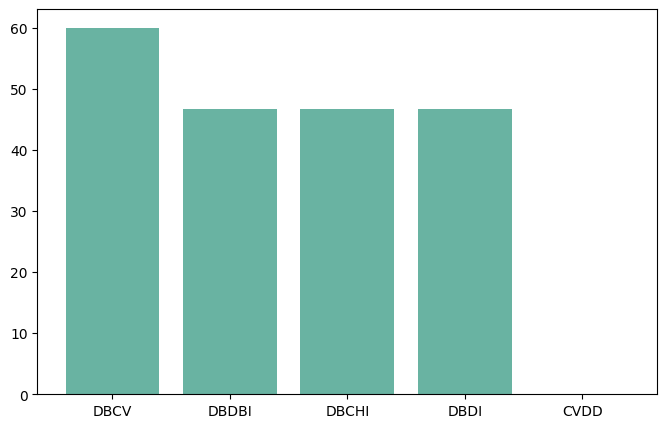

In [ ]:
final_summary_table["% Consistent"] = (final_summary_table["N°Consistent"] / 15) * 100
final_summary_table["% Consistent"] = final_summary_table["% Consistent"].fillna(0)
plt.figure(figsize=(8, 5))
bars = plt.bar(final_summary_table["Metric"], final_summary_table["% Consistent"], color="#69b3a2")


/tmp/ipython-input-3439161921.py:26: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(final_summary_table["Metric"], rotation=25, ha='right')


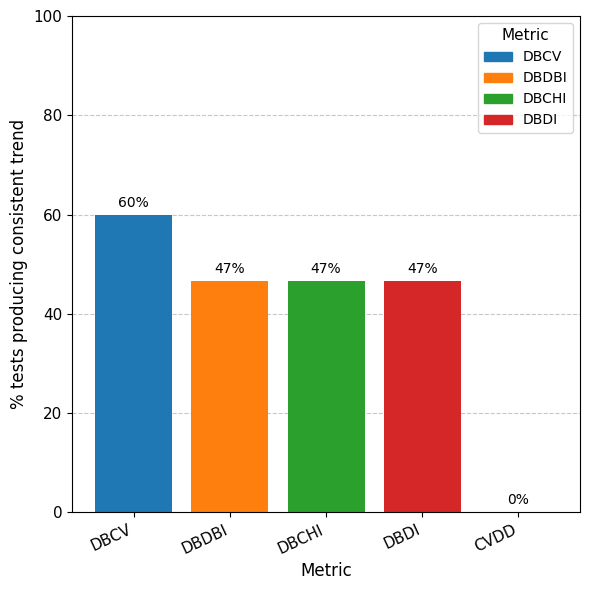

In [ ]:
import matplotlib.pyplot as plt

colors = ["#1f77b4", "#ff7f0e", "#2ca02c", "#d62728"]

fig, ax = plt.subplots(figsize=(6, 6))  # leggermente più largo

bars = ax.bar(final_summary_table["Metric"], final_summary_table["% Consistent"], color=colors)

# Aggiunta percentuali sopra le barre
for bar in bars:
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2.0, height + 1, f"{height:.0f}%",
            ha='center', va='bottom', fontsize=10)

# Miglioramenti estetici
ax.set_axisbelow(True)
ax.yaxis.grid(True, linestyle='--', alpha=0.7)
ax.xaxis.grid(False)

ax.set_ylabel("% tests producing consistent trend", fontsize=12)
ax.set_xlabel("Metric", fontsize=12)
ax.set_ylim(0, 100)
ax.tick_params(axis='both', labelsize=11)

# Rotazione delle etichette sull’asse X
ax.set_xticklabels(final_summary_table["Metric"], rotation=25, ha='right')

# Legenda
handles = [plt.Rectangle((0,0),1,1, color=color) for color in colors]
legend_labels = final_summary_table["Metric"]
ax.legend(handles, legend_labels, title="Metric", loc="upper right", fontsize=10, title_fontsize=11)

plt.tight_layout()
plt.savefig("consistencies.pdf", format="pdf")
